In [9]:
import pandas as pd
import json


json_file_path = 'data/raw/2024-09-11 District A Benchmarks.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#normalize/ convert list to dict
def normalize_json_column(column):
    if isinstance(column, list) and len(column) > 0 and isinstance(column[0], dict):
        return pd.json_normalize(column, sep='_')
    return pd.DataFrame() #normalize/ convert list to dict

# Normalize each column
benchmarks_df = normalize_json_column(data['benchmarks'])

In [3]:
import pandas as pd
import json

with open(r'data/raw/2024-09-11 District A Scores.json', 'r') as file:
    scores_json = json.loads(file.read())

scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)

In [5]:
scores_df

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


# Scores vs. course section rosters

In [11]:
benchmarks_df

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


### import district data

In [13]:

json_file_path = 'data/raw/district.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#normalize/ convert list to dict
def normalize_json_column(column):
    if isinstance(column, list) and len(column) > 0 and isinstance(column[0], dict):
        return pd.json_normalize(column, sep='_')
    return pd.DataFrame()  

# Normalize each column
benchmarks_2_df = normalize_json_column(data['benchmarks'])
schools_df = normalize_json_column(data['schools'])
course_sections_df = normalize_json_column(data['courseSections'])
course_section_rosters_df = normalize_json_column(data['courseSectionRosters']) #will only use this for this EDA
scores_2_df = normalize_json_column(data['scores']) 

In [15]:
course_section_rosters_df 

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,
...,...,...,...,...,...
612236,7254071,401685,53169,4,RTI-Redville
612237,7254072,401685,53170,3,RTI-Redville
612238,7254073,401685,53286,4,RTI-Redville
612239,7254074,401685,53399,3,RTI-Redville


In [17]:
course_section_rosters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612241 entries, 0 to 612240
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               612241 non-null  object
 1   courseSectionId  612241 non-null  object
 2   studentId        612241 non-null  object
 3   studentLevel     612241 non-null  object
 4   ticket           612241 non-null  object
dtypes: object(5)
memory usage: 23.4+ MB


### print unique values in course_section_rosters_df.columns:

In [20]:


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


for column in course_section_rosters_df.columns:
    unique_values = course_section_rosters_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
['1047696' '1047704' '1047706' ... '7254073' '7254074' '7254075']


Unique values in column 'courseSectionId':
['39975' '39976' '39977' ... '401683' '401684' '401685']


Unique values in column 'studentId':
['45333' '56116' '45345' ... '97153' '259606' '259601']


Unique values in column 'studentLevel':
['4' '3' '2' '1' '0' '8' '5' '7' '6' '12' '10' '9' '11' '98' '99' '97'
 '96']


Unique values in column 'ticket':
['' '0' 'RTI-Redville']




### Frequency of Each Value in `course_section_rosters_df`
- **Very few `RTI-redville` values** under the column `'ticket'`.
- Under the **`studentLevel`** column, the frequency of **96-97** is relatively lower than **98-99** but consists of **4,000 values** altogether.
- Under the **`courseSectionId`** column, the following IDs have a frequency of 10,000 values up to 73,000. Most other ID's have a frequency of under 1000

  - 63442, 63439, 118660, 118659, 118658, 80314, 80315, 80316, 63437, 63473, 63440

- 


In [23]:
# Assuming course_section_rosters_df is already defined and loaded

# List of columns to check
columns_to_check = ['ticket', 'studentLevel', 'courseSectionId']

# Print value counts for the specified columns
for column in columns_to_check:
    print(f"Value counts in column '{column}':")
    print(course_section_rosters_df[column].value_counts())
    print("\n")


Value counts in column 'ticket':
ticket
                610343
0                 1628
RTI-Redville       270
Name: count, dtype: int64


Value counts in column 'studentLevel':
studentLevel
10    54246
9     52595
7     51315
1     49253
4     49171
8     48846
2     48820
12    47993
3     47529
11    47342
5     41209
6     40529
0     28458
99     2930
98     1290
97      670
96       45
Name: count, dtype: int64


Value counts in column 'courseSectionId':
courseSectionId
63442     72689
63439     72689
118660    11897
118659    11897
118658    11897
80314     11378
80315     11378
80316     11378
63437     11355
63473     11355
63440     11355
63487      2949
118650     1330
63455      1237
118656     1204
118653     1201
80306      1196
80312      1185
63486      1185
63480      1161
63467      1154
63483      1126
118648     1125
80309      1105
63461      1093
80311      1040
118657     1037
118655     1010
80313       997
118651      985
80307       984
63469       980
63485    

### StudentID column of course_section_rosters_df analysis
- listed in this cell due to data limits
- in column studentId, there is a frequency of the same ID up to 79 times. 

In [26]:
# List of columns to check
columns_to_check_2 = [ 'studentId']

# Print value counts for the specified columns
for column in columns_to_check_2:
    print(f"Value counts in column '{column}':")
    print(course_section_rosters_df[column].value_counts())
    print("\n")



Value counts in column 'studentId':
studentId
46126     79
46373     77
50067     75
46992     74
49946     74
46365     73
46414     72
46372     72
50601     72
46409     72
47404     72
46867     71
46955     71
46747     71
46124     71
47392     70
46313     70
51277     70
47841     70
47054     70
48318     70
46988     70
46385     70
46243     70
47280     70
46922     70
49217     70
47084     70
48095     70
48497     70
48407     70
47093     70
47052     69
51223     69
46357     69
52049     69
48333     69
46152     69
46364     69
51191     69
47270     69
51318     69
46202     69
45061     69
47390     69
46589     69
46982     69
46990     69
48048     69
47482     69
46066     69
47406     69
46584     69
46670     69
46784     69
48151     69
46968     68
47401     68
46946     68
46850     68
47520     68
48112     68
47530     68
48551     68
46537     68
47100     68
47488     68
47276     68
47207     68
48060     68
47545     68
48495     68
47118     68
46728

### Note that the frequency of every id count is 1. 
- due to data limits, I only printed the first third on ID values

In [29]:
'''
columns_to_check_3 = ['id']

# Print value counts for the specified columns, showing only the first third
for column in columns_to_check_3:
    value_counts = course_section_rosters_df[column].value_counts()
    third_length = len(value_counts) // 3  # third of length
    print(f"Value counts in column '{column}' (first third):")
    print(value_counts.iloc[:third_length])  # Print only the first third
    print("\n")
'''

'\ncolumns_to_check_3 = [\'id\']\n\n# Print value counts for the specified columns, showing only the first third\nfor column in columns_to_check_3:\n    value_counts = course_section_rosters_df[column].value_counts()\n    third_length = len(value_counts) // 3  # third of length\n    print(f"Value counts in column \'{column}\' (first third):")\n    print(value_counts.iloc[:third_length])  # Print only the first third\n    print("\n")\n'

In [31]:
columns_to_check_3 = ['id']

# Print value counts for the specified columns where frequency is more than 1
for column in columns_to_check_3:
    value_counts = course_section_rosters_df[column].value_counts()
    filtered_values = value_counts[value_counts > 1]  # Filter values with frequency > 1
    print(f"Value counts in column '{column}' where frequency is more than 1:")
    print(filtered_values)
    print("\n")


Value counts in column 'id' where frequency is more than 1:
Series([], Name: count, dtype: int64)




# Import scores_df

In [7]:
scores_df

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


## analyzing scores_df and addressing null values

In [34]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [36]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

**There are several missing values in  value_scantronMath** however, those were replaced by 0

In [40]:

null_count_value_scantronMath = scores_df['value_scantronMath'].isnull().sum()

print(f"Total number of nulls in 'value_scantronMath': {null_count_value_scantronMath}")


Total number of nulls in 'value_scantronMath': 50490


In [42]:
scores_df['value_scantronMath'].unique()

array([   0., 2841., 2808., ..., 3442., 3389., 3341.])

In [44]:
import matplotlib.pyplot as plt

value_counts = scores_df['value_scantronMath'].value_counts(dropna=False)

print(value_counts)


value_scantronMath
0.0       114351
NaN        50490
2644.0       325
2416.0       321
2562.0       309
2417.0       307
2414.0       298
2415.0       297
2413.0       297
2558.0       296
2580.0       288
2555.0       286
2643.0       285
2581.0       284
2419.0       283
2579.0       279
2560.0       276
2411.0       275
2569.0       274
2554.0       272
2583.0       271
2568.0       269
2412.0       269
2573.0       267
2544.0       266
2418.0       266
2578.0       265
2556.0       265
2420.0       263
2410.0       262
2572.0       261
2574.0       259
2636.0       259
2553.0       258
2582.0       257
2425.0       257
2645.0       257
2642.0       256
2564.0       255
2592.0       255
2561.0       253
2549.0       253
2576.0       253
2563.0       253
2571.0       251
2479.0       249
2559.0       247
2404.0       247
2570.0       246
2548.0       246
2469.0       246
2409.0       245
2566.0       245
2651.0       245
2608.0       242
2494.0       242
2565.0       241
2637.0      

In [52]:
scores_df['value_scantronMath'].fillna(0, inplace=True)

In [54]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

### unique values in every column in scores_df

In [56]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for column in scores_df.columns:
    unique_values = scores_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'studentId':
[ 44774  44775  44776 ... 259512 259513 259514]


Unique values in column 'studentLevel':
[ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]


Unique values in column 'year':
[2018 2017 2020 2015 2016 2014    0]


Unique values in column 'measurementTypeId':
[6 4 5 0 3 1 2 7]


Unique values in column 'subgroup_specialEd':
[   0    1    2 1000    7    6]


Unique values in column 'subgroup_lunchStatus':
[0 1 3 6 5]


Unique values in column 'subgroup_gender':
[0 4 3 6 5]


Unique values in column 'subgroup_ethnicity':
[ 0 10  9 18 17]


Unique values in column 'subgroup_ell':
[0 3]


Unique values in column 'subgroup_bottom25':
[0 1]


Unique values in column 'value_actMathScore':
[ 0. 14.  9. 15. 18. 16. 22. 25. 34. 17. 27. 13. 11. 19. 21. 20. 23. 24.
 12. 26. 30. 28. 29. 32. 10. 31. 36. 35. 33.]


Unique values in column 'value_actEnglishScore':
[ 0. 14.  3. 15. 25. 24. 21. 36. 11. 23. 16. 20. 17. 13. 22. 12. 10.  8.
  6.  7.  9. 19. 27. 26. 

### range of values in columns of scores_df
- why does studentLevel have -1 as a value? and values in the 90s?
- what is the definition of the unique values in 'subgroup_specialEd'?

  - also need to understand the categories for measurementTypeId, and the other various subgroup categories

In [59]:
#prints the range of values
for column in scores_df.columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

Range of values in column 'studentId': 44774 to 259514


Range of values in column 'studentLevel': -1 to 99


Range of values in column 'year': 0 to 2020


Range of values in column 'measurementTypeId': 0 to 7


Range of values in column 'subgroup_specialEd': 0 to 1000


Range of values in column 'subgroup_lunchStatus': 0 to 6


Range of values in column 'subgroup_gender': 0 to 6


Range of values in column 'subgroup_ethnicity': 0 to 18


Range of values in column 'subgroup_ell': 0 to 3


Range of values in column 'subgroup_bottom25': 0 to 1


Range of values in column 'value_actMathScore': 0.0 to 36.0


Range of values in column 'value_actEnglishScore': 0.0 to 36.0


Range of values in column 'value_actReadingScore': 0.0 to 36.0


Range of values in column 'value_actScienceScore': 0.0 to 36.0


Range of values in column 'value_actCompositeScore': 0.0 to 35.0


Range of values in column 'value_nweaMath': 0.0 to 899.0


Range of values in column 'value_nweaReading': 0.0 to 255.0


Range

## the next section of code
- excludes columns which only contain 0's  (due to a large section of data having null ie zeros)
        - This helps me get a more accurate range for test scores
- also prints out columns which contain only 0's

In [63]:

score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
    'value_iReadyReading', 'value_actMasteryComposite', 'value_actMasteryReading',
    'value_actMasteryMath', 'value_actMasteryScience', 'value_actMasteryEnglish',
    'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 
    'value_mapMath', 'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
    'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations',
    'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore', 'value_mapScience',
    'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
    'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency',
    'value_accessCompositeScale', 'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_scantronGeometry', 'value_MathMilestones',
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 'value_ScienceMilestones', 
    'value_LEAPScience', 'value_SocialMilestones', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 
    'value_aimsWebMath', 'value_aimsWebReading'
]

zero_only_columns = []  # To store columns with min and max both 0

for column in score_columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        
        if min_value == 0 and max_value == 0: # If both min and max are 0, add the column to the list
            zero_only_columns.append(column)
        else:
            # If the minimum is 0, skip it/ only show from the next minimum value
            if min_value == 0:
                non_zero_min_value = scores_df[column][scores_df[column] != 0].min()
                print(f"Range of values in column '{column}': {non_zero_min_value} to {max_value}")
            else:
                print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

# After the loop, print columns where min and max are both 0
if zero_only_columns:
    print("Columns with both minimum and maximum values of 0:")
    print(zero_only_columns)
else:
    print("No columns found with both minimum and maximum values of 0.")


Range of values in column 'value_actMathScore': 9.0 to 36.0


Range of values in column 'value_actEnglishScore': 3.0 to 36.0


Range of values in column 'value_actReadingScore': 1.0 to 36.0


Range of values in column 'value_actScienceScore': 1.0 to 36.0


Range of values in column 'value_actCompositeScore': 7.0 to 35.0


Range of values in column 'value_nweaMath': 116.0 to 899.0


Range of values in column 'value_nweaReading': 120.0 to 255.0




Range of values in column 'value_iReadyMath': 264 to 624


Range of values in column 'value_iReadyReading': 244 to 761


Range of values in column 'value_actMasteryComposite': 10.0 to 33.0


Range of values in column 'value_actMasteryReading': 7.0 to 33.0


Range of values in column 'value_actMasteryMath': 13.0 to 32.0


Range of values in column 'value_actMasteryScience': 8.0 to 33.0


Range of values in column 'value_actMasteryEnglish': 6.0 to 36.0


Range of values in column 'value_nweaELA': 305.0 to 898.0


Range of values in column 'value

### Columns with only 0's in the column
['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra', 'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath', 'value_aimsWebReading']

### frequency of values in score_df non-test score related columns
- relatively large number of values in years 2017-2018, and few in 2020
- StudentLevel: relatively large number of values between grades 4-8
- 'measurementTypeId'- large number of 3's, few 7's
- subgroup lunch- very few values in 1000? what does that mean?
- - subgroup ell only has 4 values under the second subcategory

In [68]:
# value counts of non score columns

# List of columns to check for value counts
columns_to_check = [
    'studentLevel', 'year', 'measurementTypeId', 
    'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 
    'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']


for column in columns_to_check:
    print(f"Value counts in column '{column}':")
    print(scores_df[column].value_counts())
    print("\n")

Value counts in column 'studentLevel':
studentLevel
 4     39257
 5     39053
 3     38960
 6     38309
 7     37406
 8     36716
 2     17089
 10    13941
 9     13388
 11    11835
 1      8208
 0      5333
 12     3254
 98      654
 99      275
 97       59
 96        9
-1         4
Name: count, dtype: int64


Value counts in column 'year':
year
2017    151911
2018    116297
2016     32949
2015      1220
2014       936
2020       429
0            8
Name: count, dtype: int64


Value counts in column 'measurementTypeId':
measurementTypeId
3    158818
1     56669
2     39977
6     17895
4     17163
5      9537
0      3580
7       111
Name: count, dtype: int64


Value counts in column 'subgroup_specialEd':
subgroup_specialEd
0       290283
7         8212
6         4296
1          899
2           47
1000        13
Name: count, dtype: int64


Value counts in column 'subgroup_lunchStatus':
subgroup_lunchStatus
0    282087
1      9120
5      6268
6      6240
3        35
Name: count, dtype: i

In [73]:
#value counts of student ID
    # there is a range of a frequency of 1-7 for each student ID
#scores_df['studentId'].value_counts()

# EDA

In [79]:
# Check the column names
print(scores_df.columns)


Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

### need to edit the code for the summary statistics

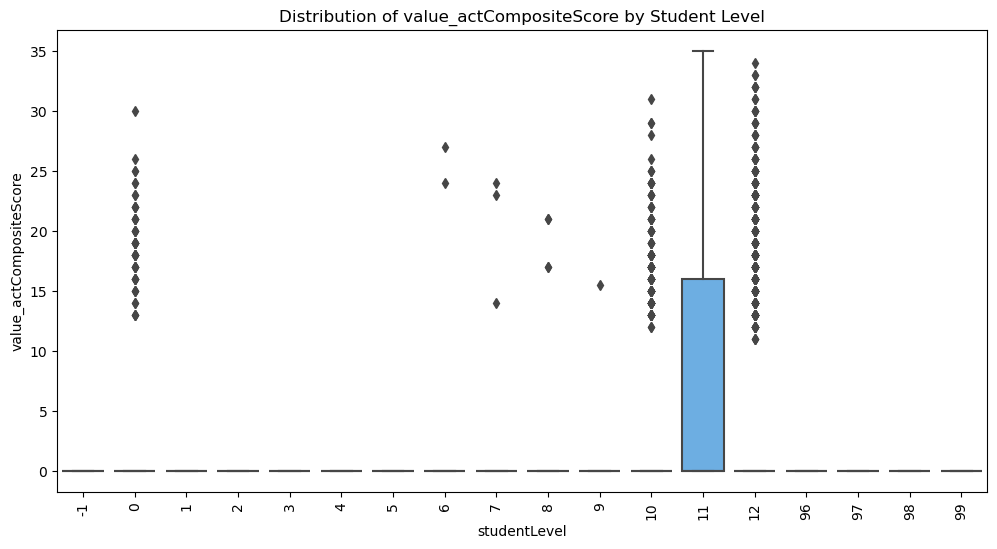

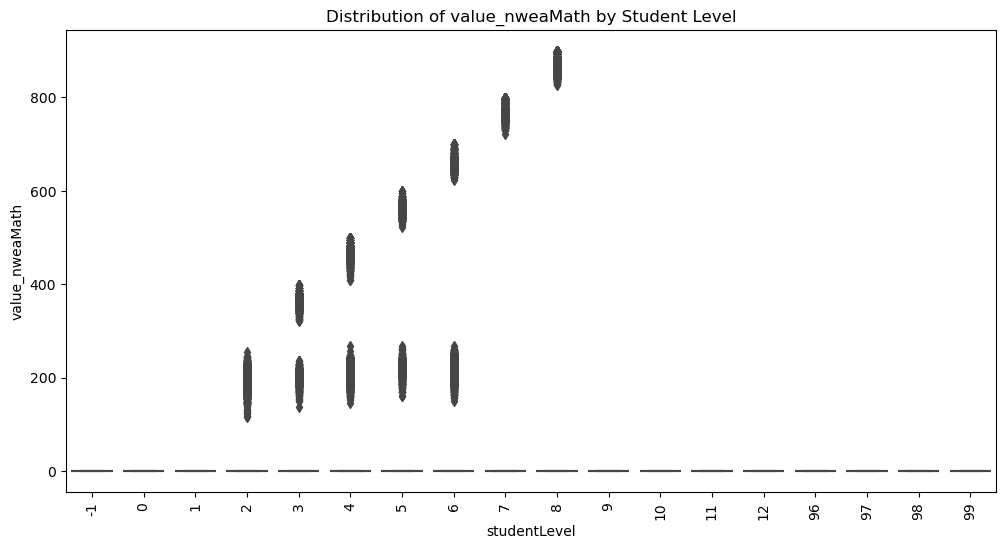

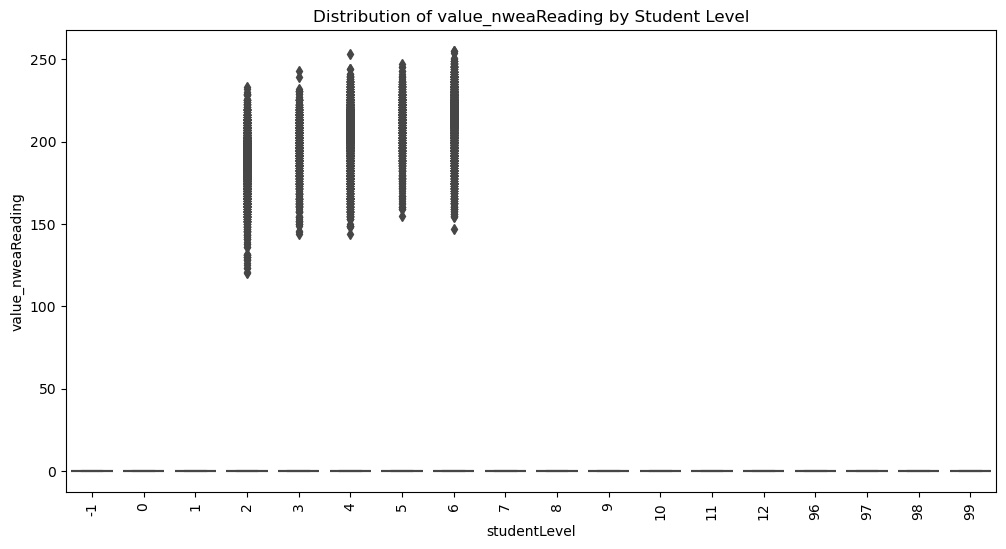

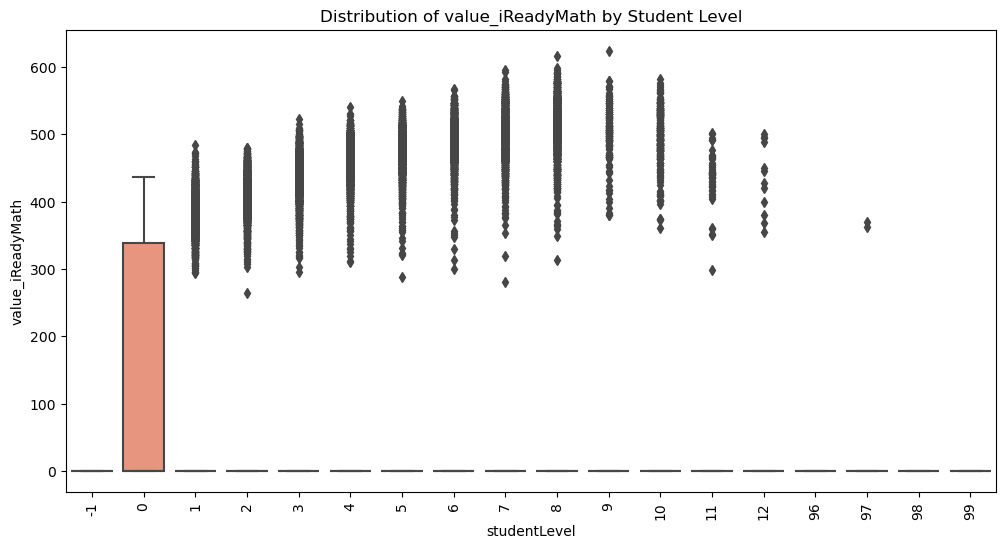

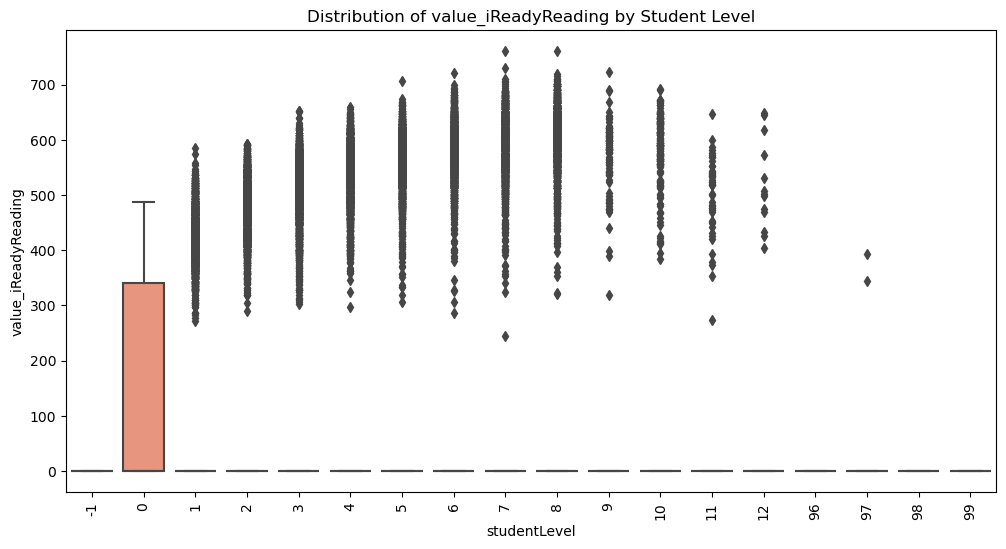

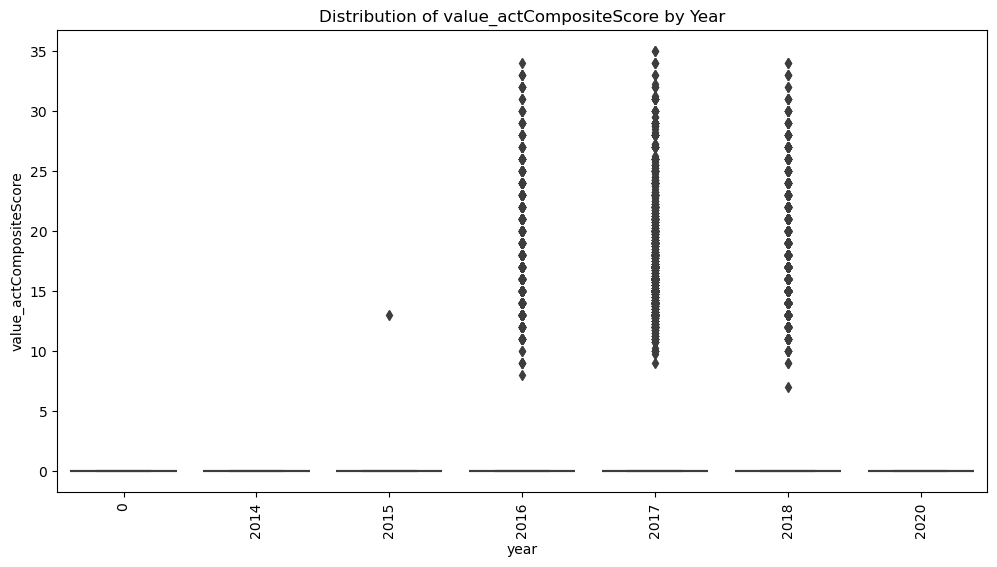

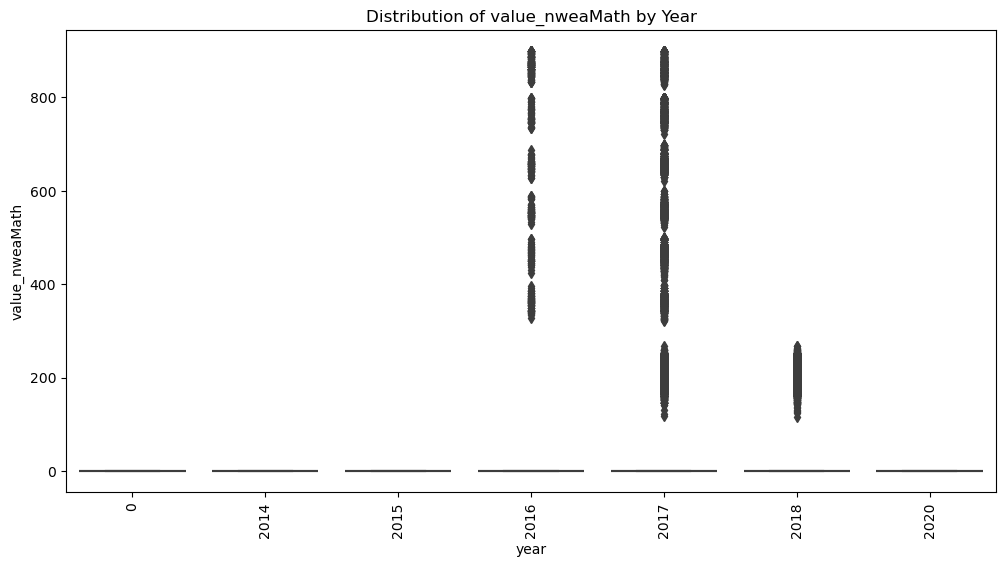

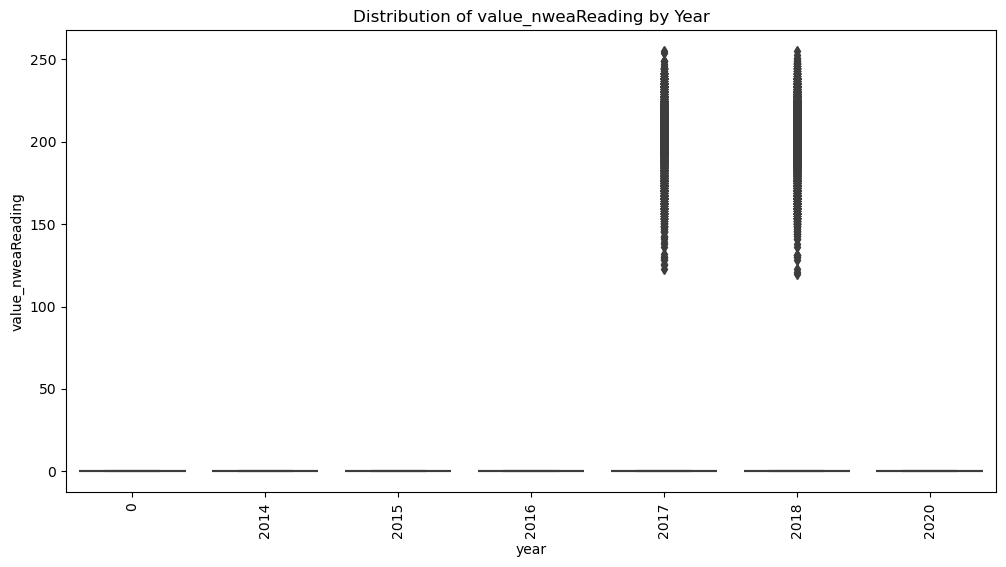

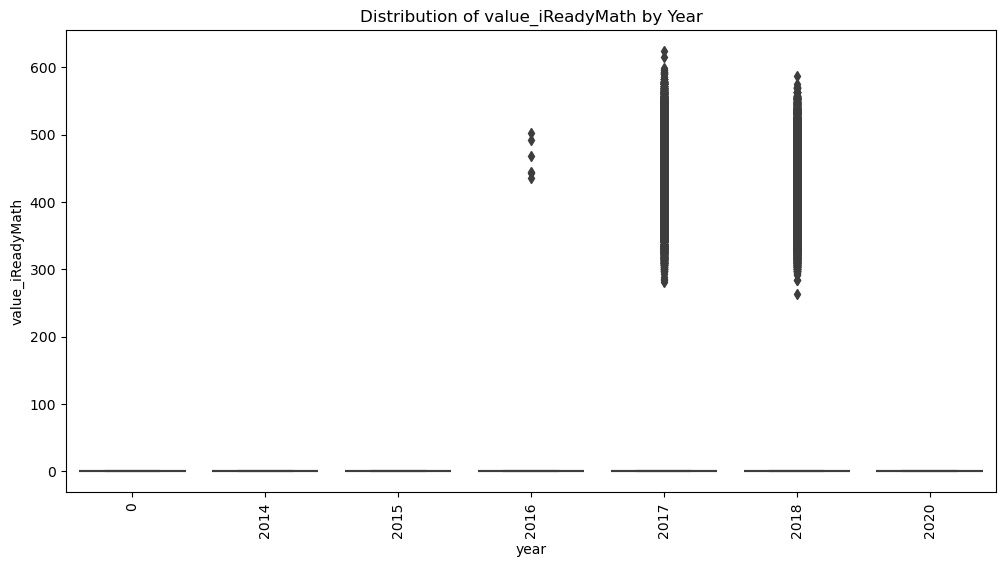

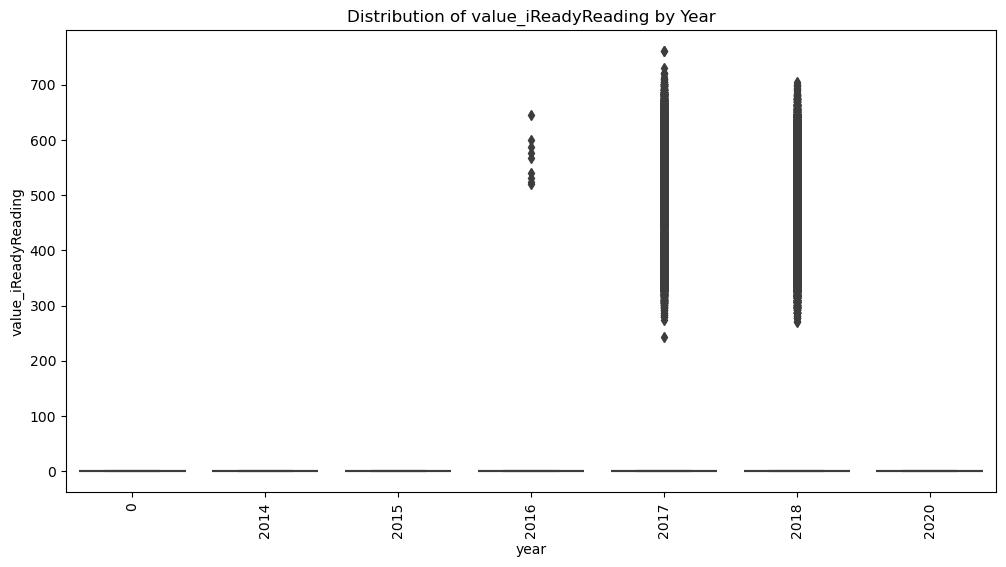

                  value_actCompositeScore                                   \
                                    count       mean       std   min   25%   
studentLevel year                                                            
-1           2016                     4.0   0.000000  0.000000   0.0   0.0   
 0           2016                   447.0   0.000000  0.000000   0.0   0.0   
             2017                  1520.0   0.651974  3.527462   0.0   0.0   
             2018                  3366.0   0.000000  0.000000   0.0   0.0   
 1           2016                   499.0   0.000000  0.000000   0.0   0.0   
             2017                  2850.0   0.000000  0.000000   0.0   0.0   
             2018                  4859.0   0.000000  0.000000   0.0   0.0   
 2           2016                   567.0   0.000000  0.000000   0.0   0.0   
             2017                  7360.0   0.000000  0.000000   0.0   0.0   
             2018                  9162.0   0.000000  0.000000  

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading'
]

for metric in performance_metrics: # Boxplots for each performance metric by studentLevel
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'Distribution of {metric} by Student Level')
    plt.xticks(rotation=90)
    plt.show()


for metric in performance_metrics: # Boxplots for each performance metric by year
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='year', y=metric)
    plt.title(f'Distribution of {metric} by Year')
    plt.xticks(rotation=90)
    plt.show()

summary_stats = scores_df.groupby(['studentLevel', 'year'])[performance_metrics].describe()
print(summary_stats)


### need to edit the code for the summary statistics (for this too)

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


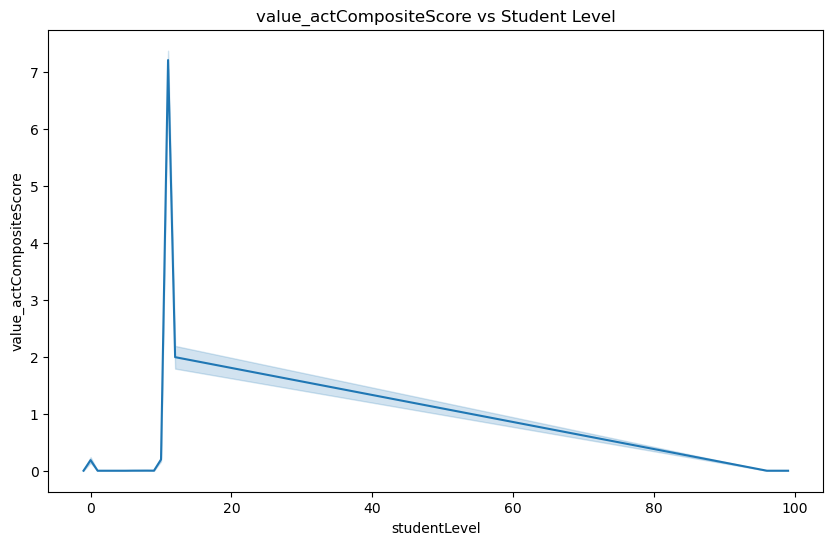

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


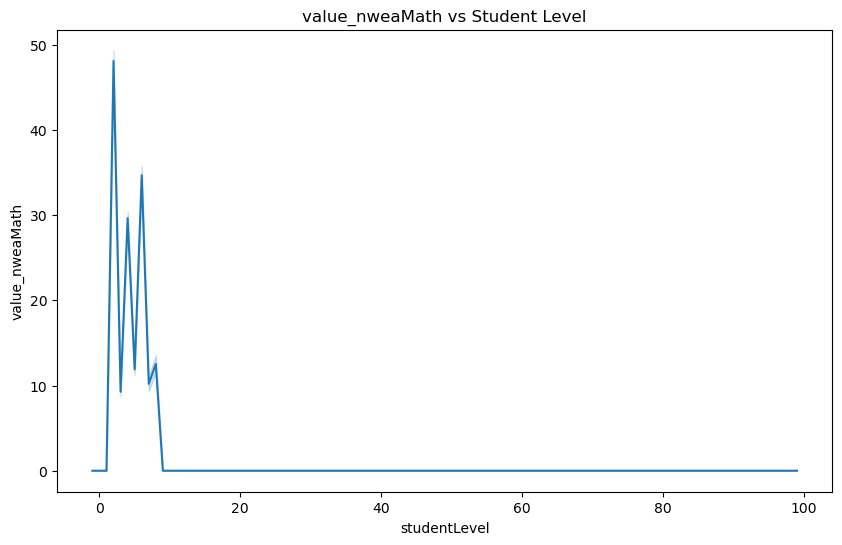

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


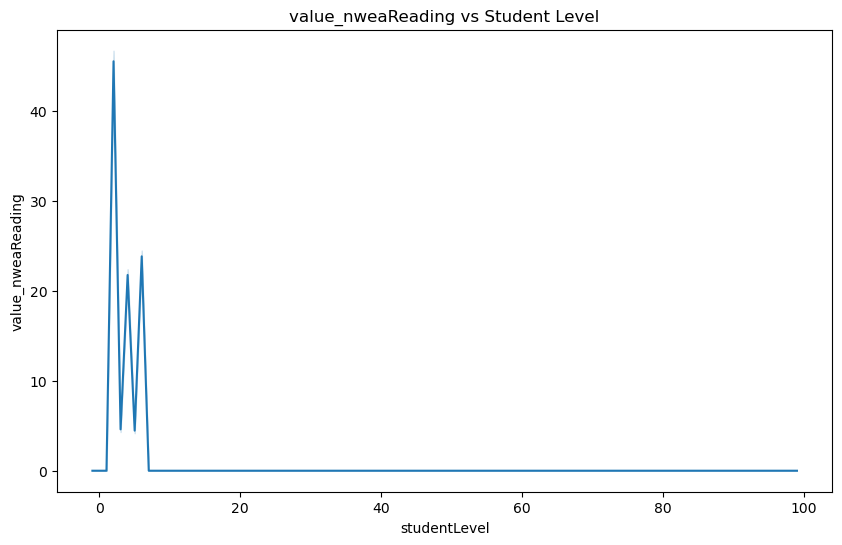

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


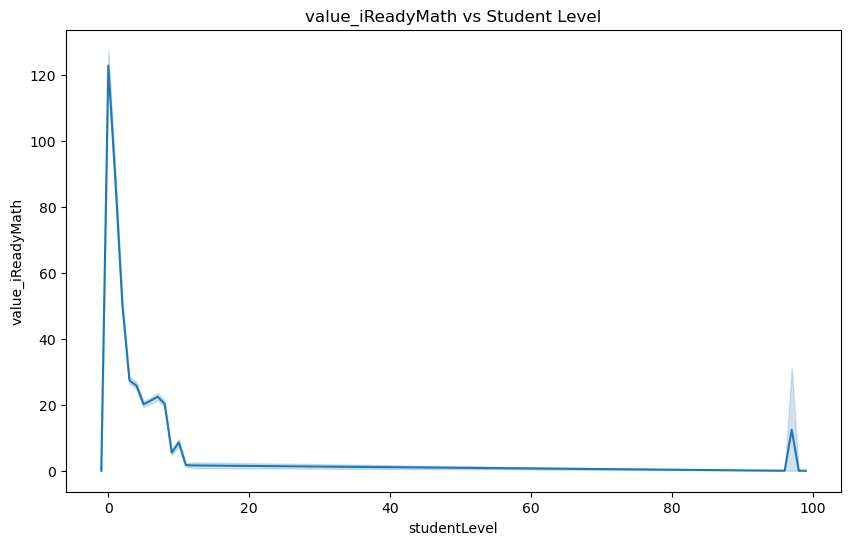

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


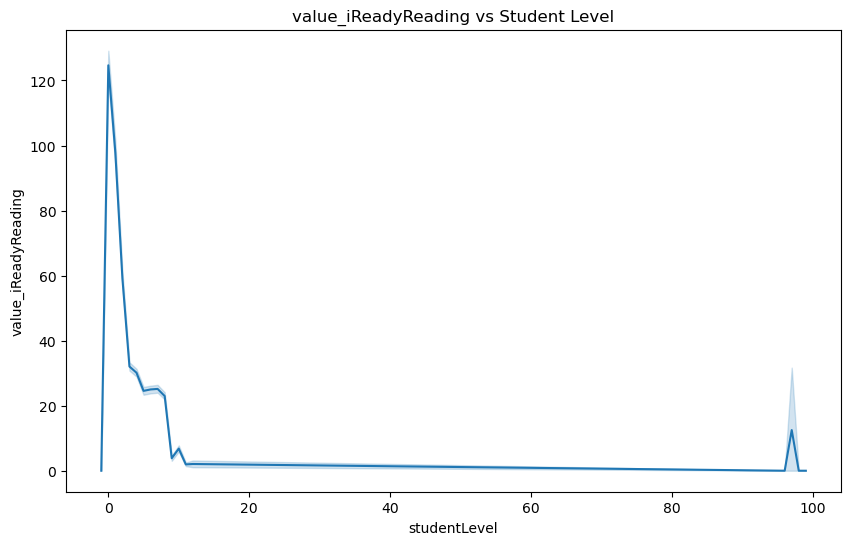

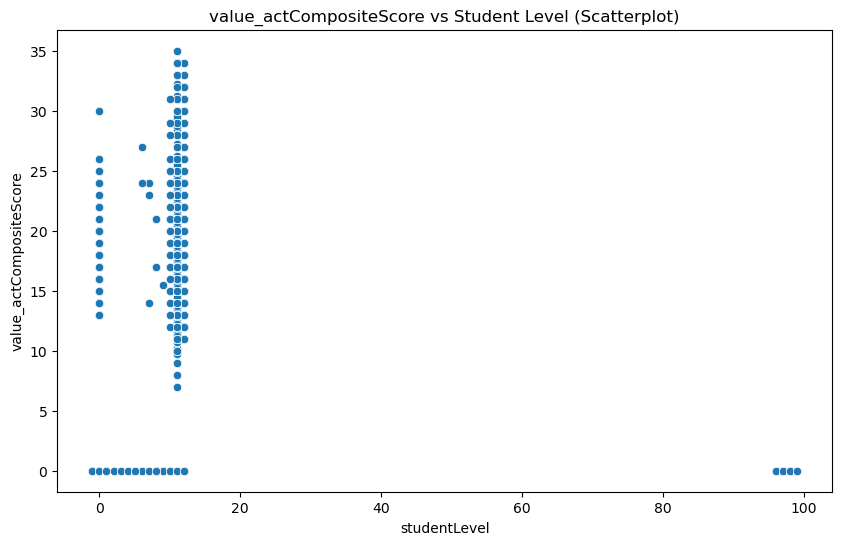

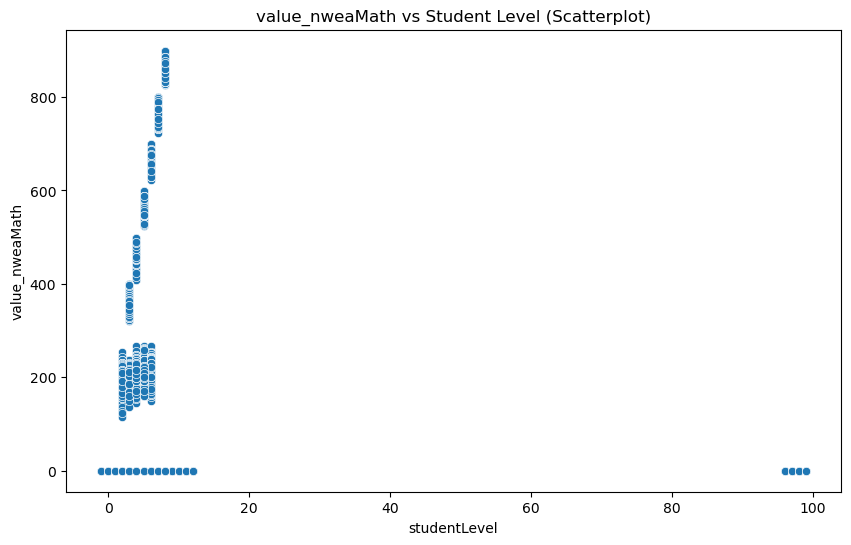

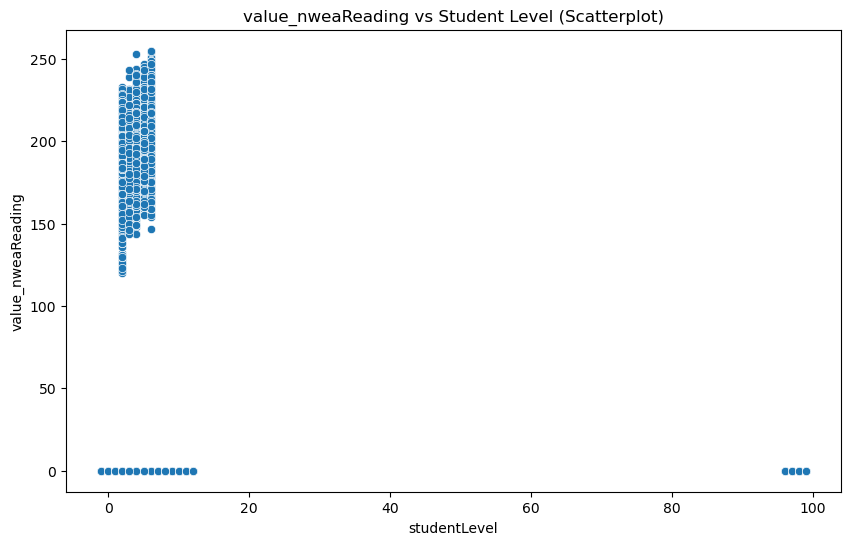

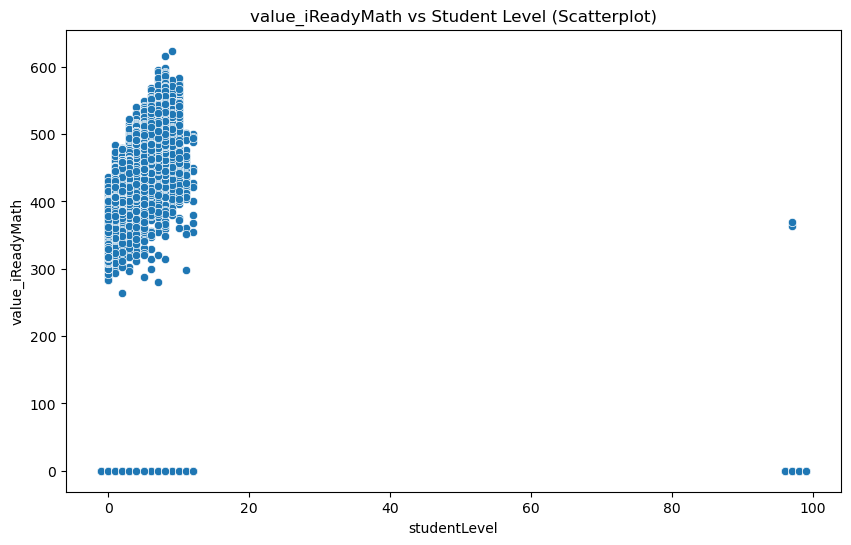

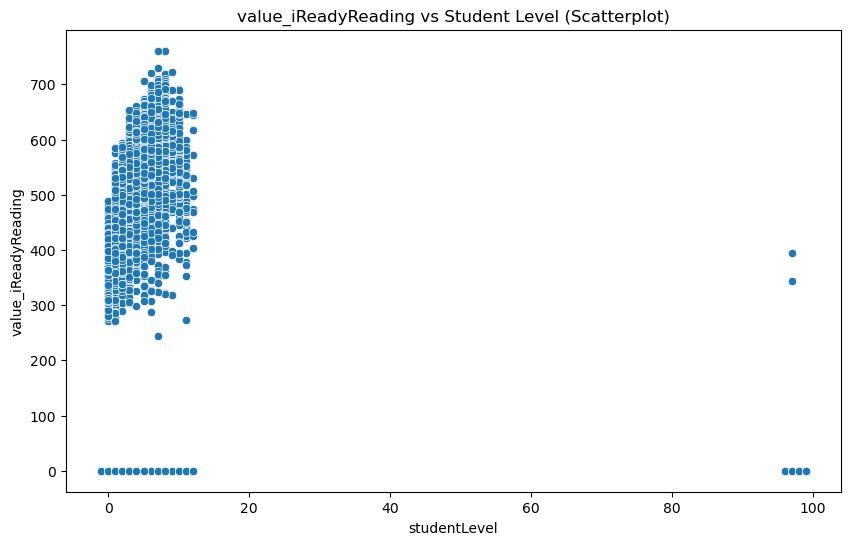

             value_actCompositeScore                                           \
                               count      mean       std  min  25%  50%   75%   
studentLevel                                                                    
-1                               4.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 0                            5333.0  0.185824  1.905634  0.0  0.0  0.0   0.0   
 1                            8208.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 2                           17089.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 3                           38960.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 4                           39257.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 5                           39053.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 6                           38309.0  0.001331  0.184565  0.0  0.0  0.0   0.0   
 7                           37406.0  0.001631  0.186491  0.0  0.0  0.0   0.0   
 8                          

In [83]:

for metric in performance_metrics: # Line plots to see trends across student_level for each performance metric
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level')
    plt.show()

for metric in performance_metrics: # Scatter plot showing performance based on student level
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level (Scatterplot)')
    plt.show()

# Summary statistics by student level
student_level_stats = scores_df.groupby('studentLevel')[performance_metrics].describe()
print(student_level_stats)


In [87]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

# correlation matrix

From the correlation matrix, it seems that a student's score on the math and reading compoenent are correlated
- regardless of the type of test- but is especially true with the ACT
- (need to further investigate this)
- 

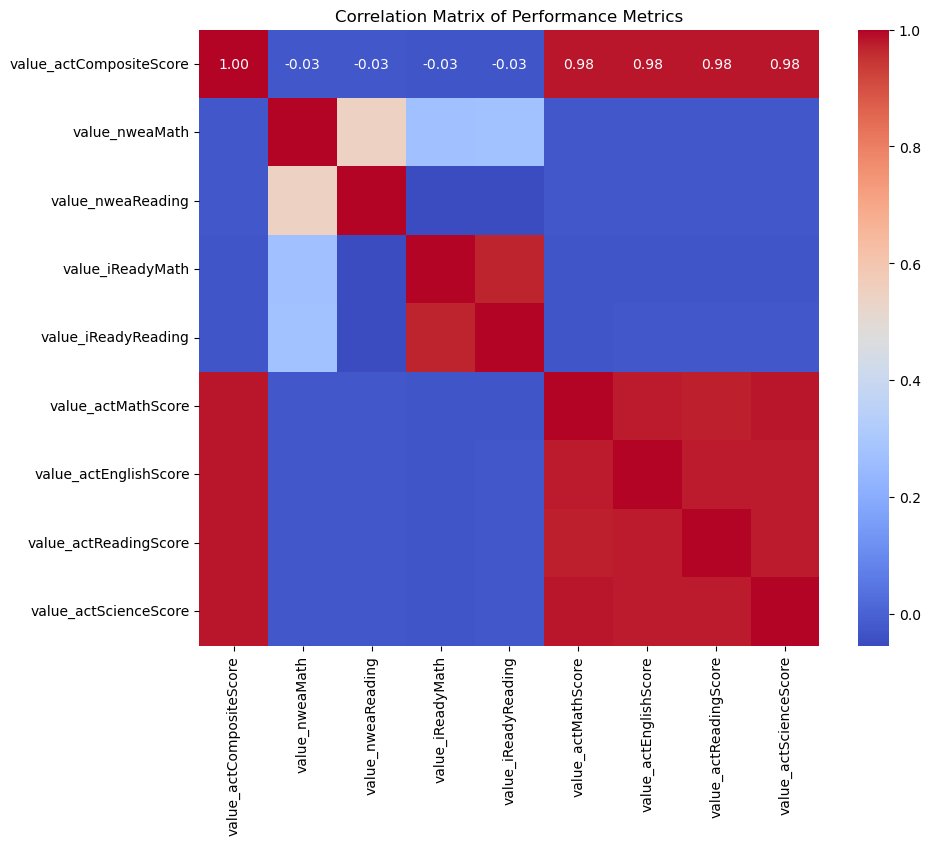

                                  value_actCompositeScore  value_nweaMath  \
studentId                                       -0.115741        0.162904   
measurementTypeId                                0.109112        0.068414   
subgroup_ell                                    -0.000473       -0.000765   
subgroup_bottom25                               -0.016300       -0.027587   
value_actMathScore                               0.981340       -0.027359   
value_actEnglishScore                            0.980398       -0.026561   
value_actReadingScore                            0.980918       -0.026720   
value_actScienceScore                            0.981843       -0.027078   
value_actCompositeScore                          1.000000       -0.027491   
value_nweaMath                                  -0.027491        1.000000   
value_nweaReading                               -0.028920        0.544939   
value_nweaEnglish                                     NaN             NaN   

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading', 'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)


### plotting boxplots to see relationships between test scores and subgroups
- haven't found anything significant yet from this data
- **DBC to see if there significant**

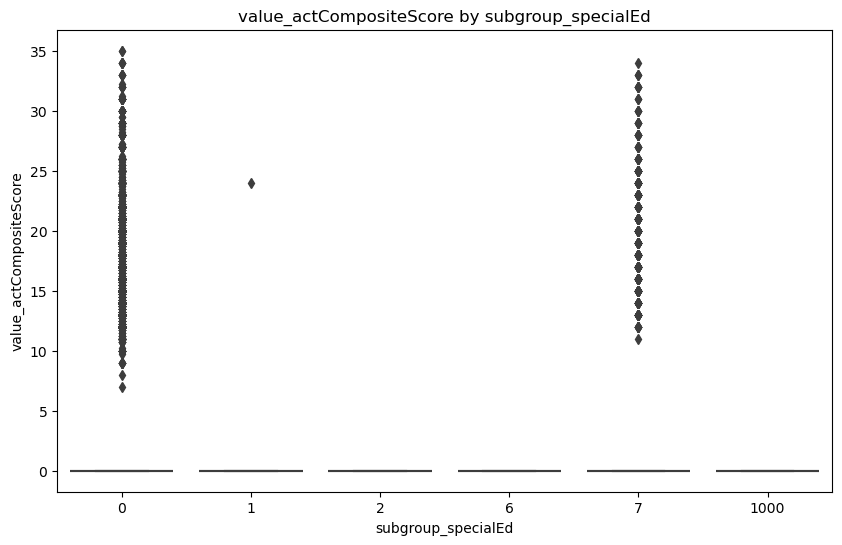

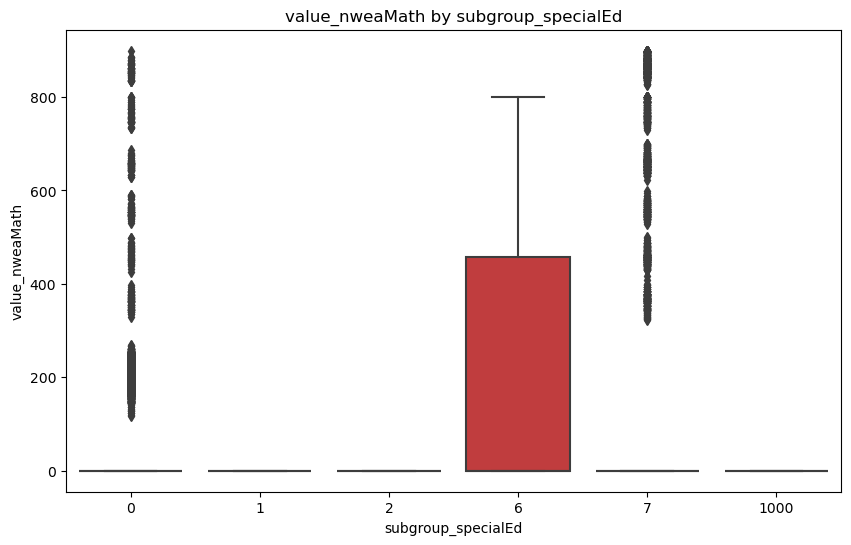

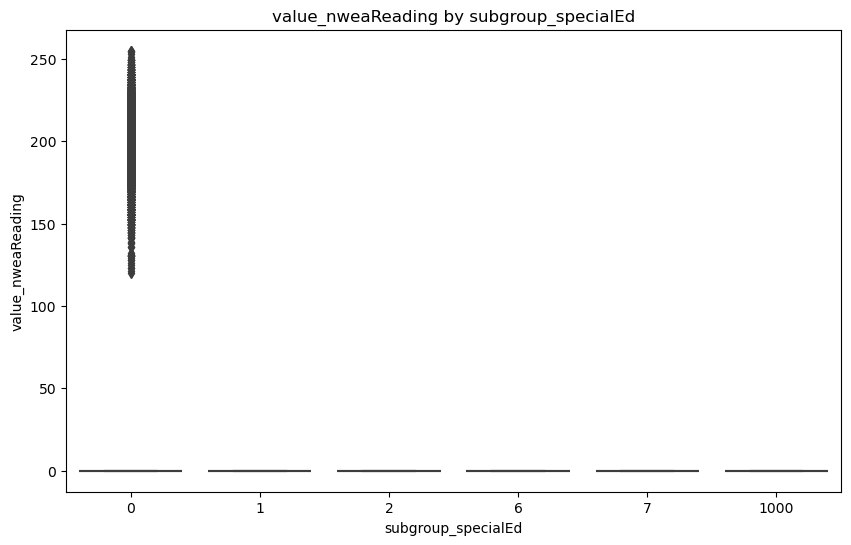

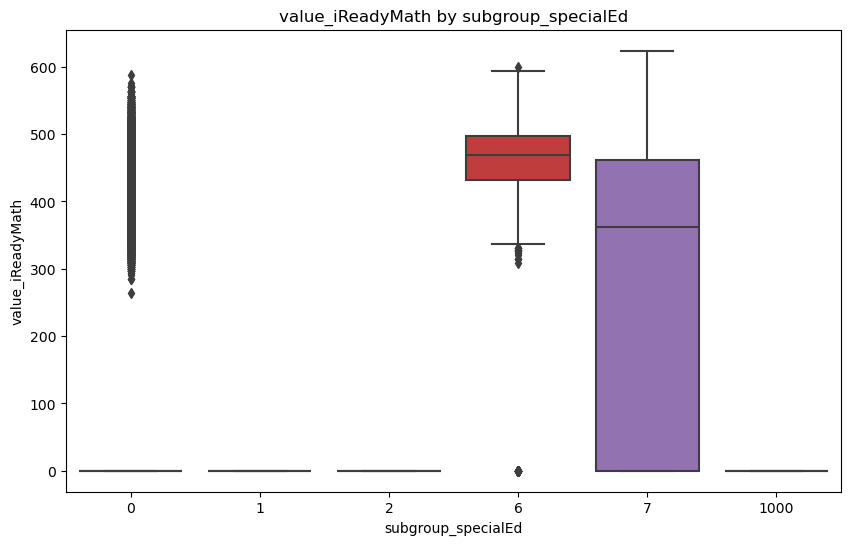

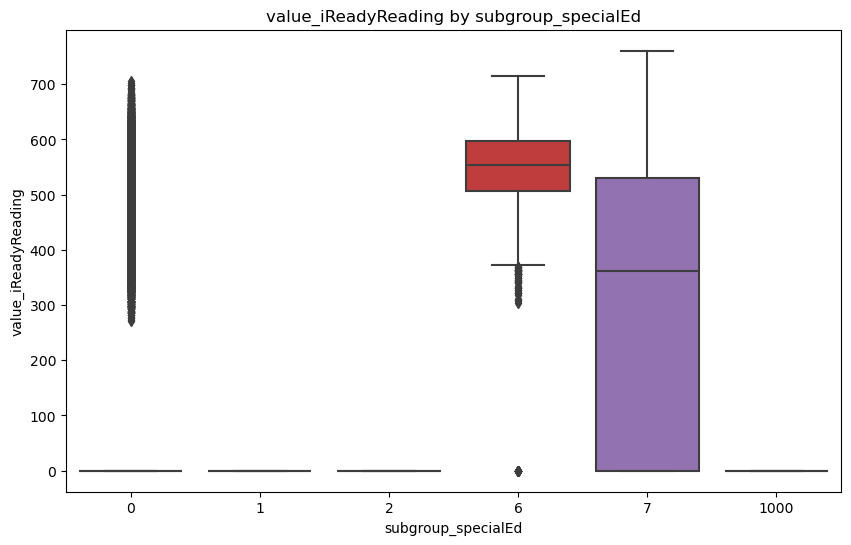

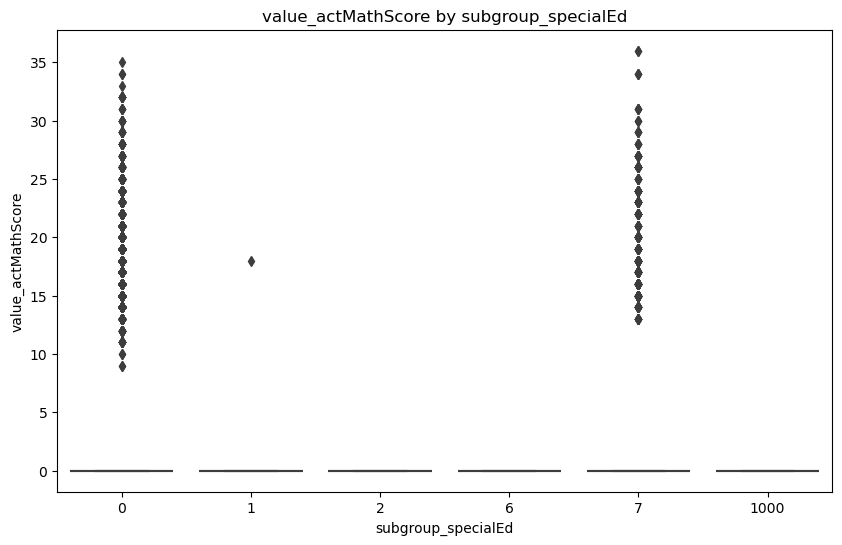

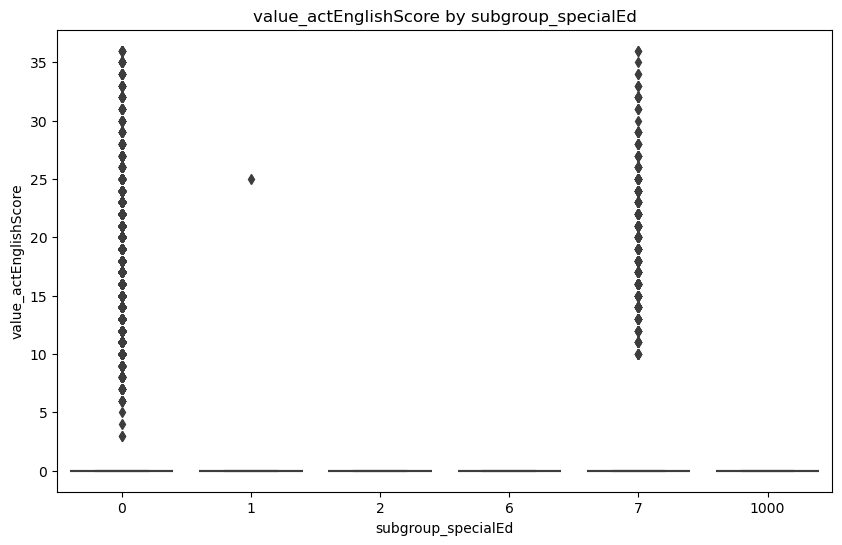

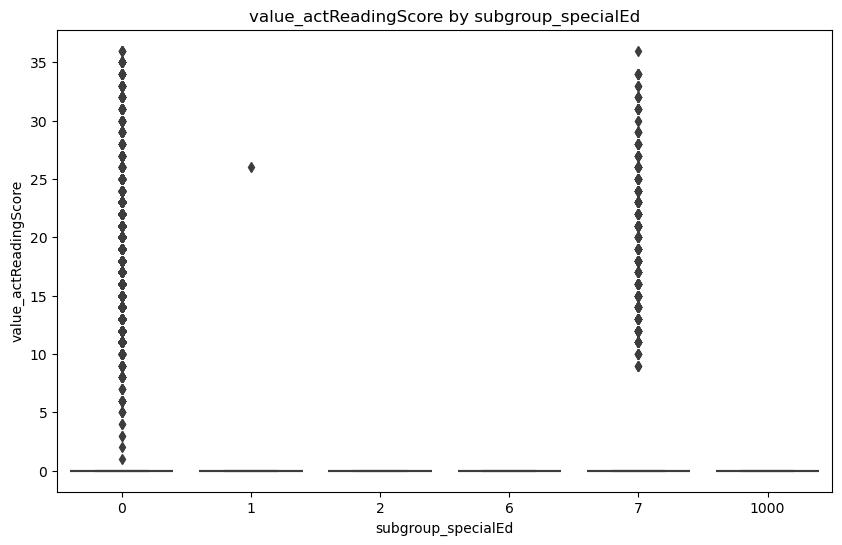

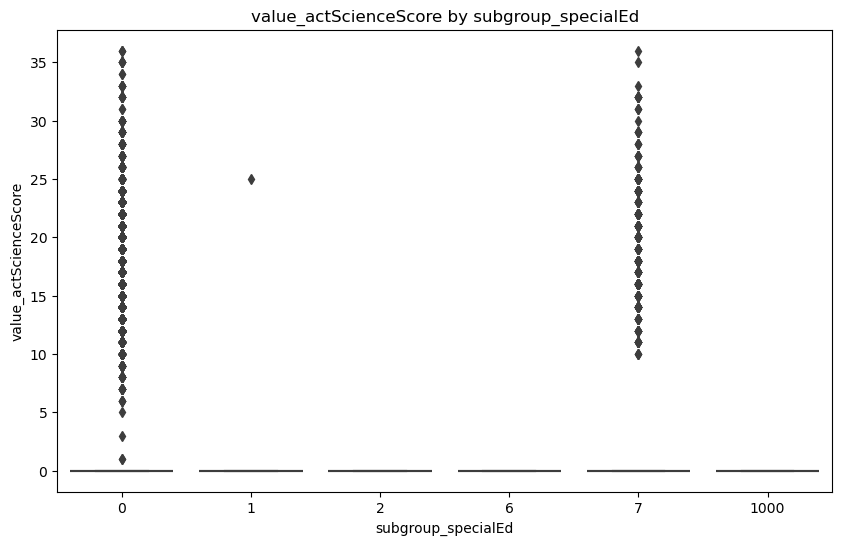

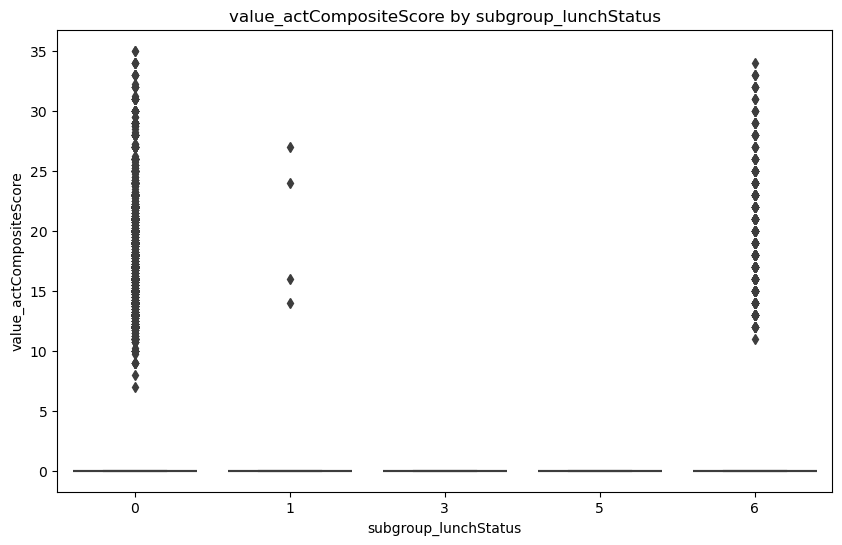

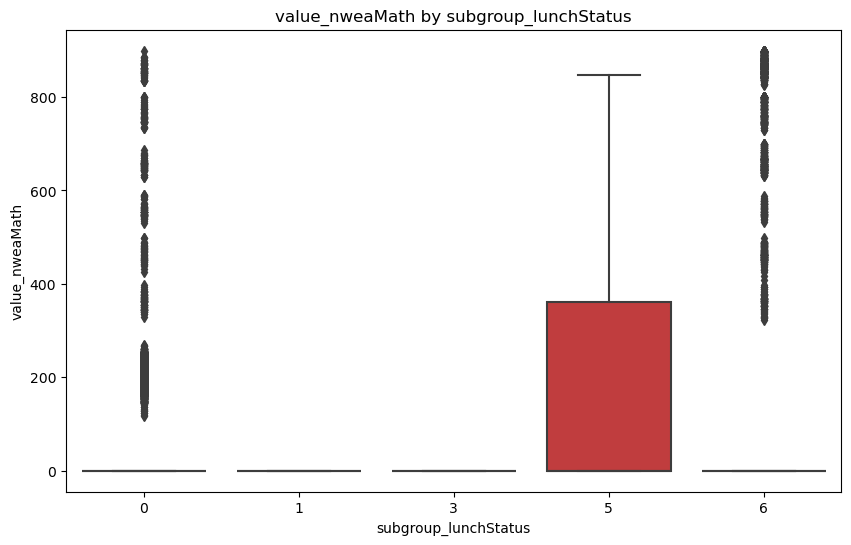

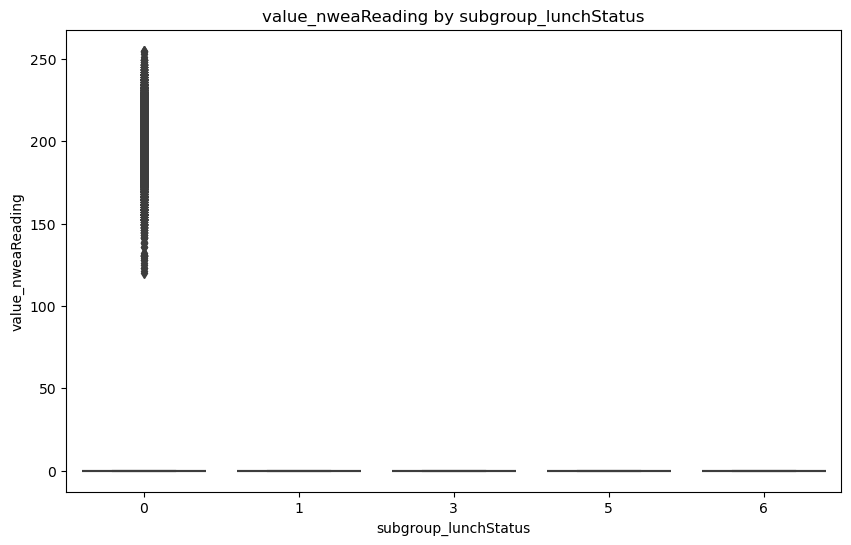

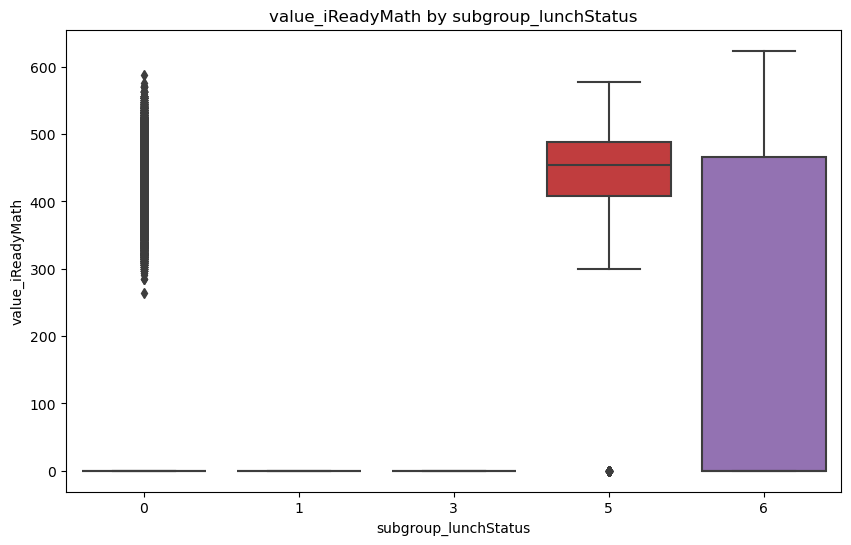

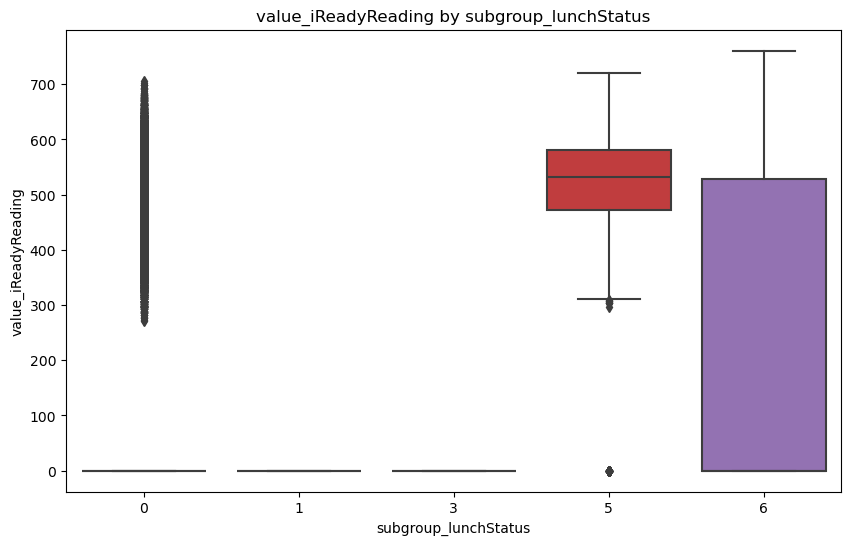

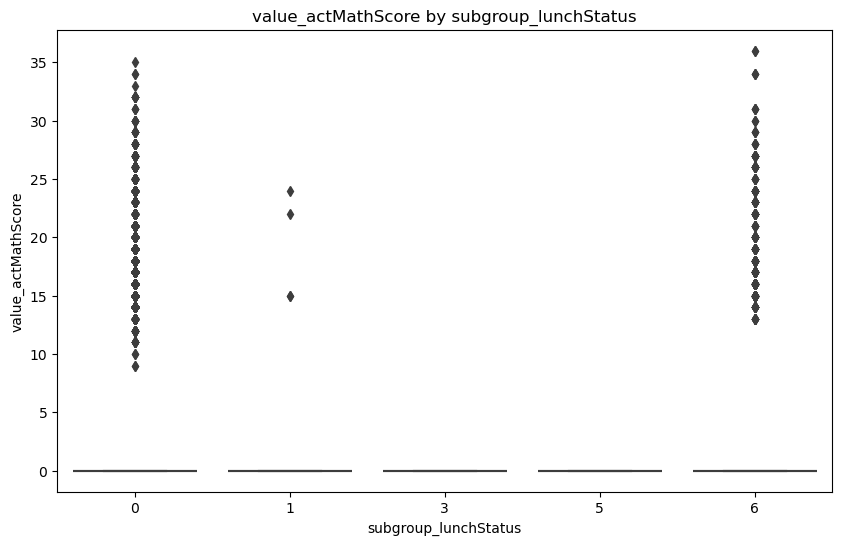

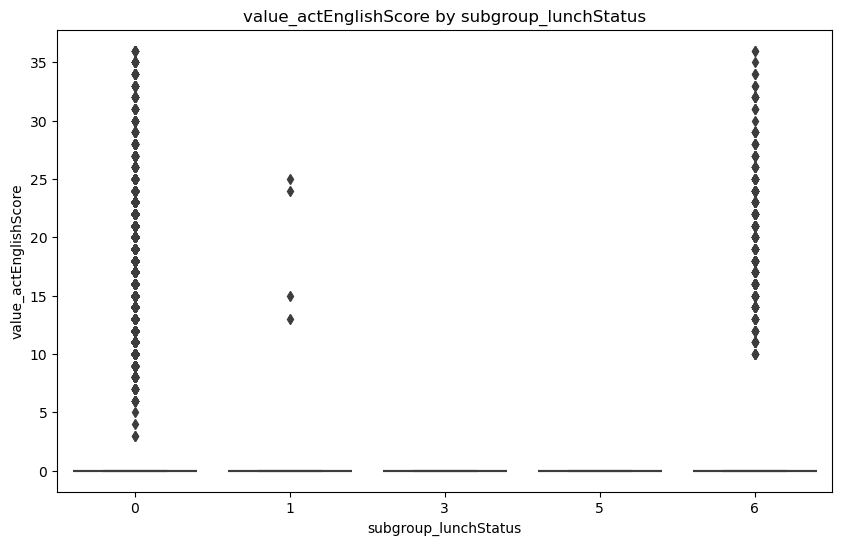

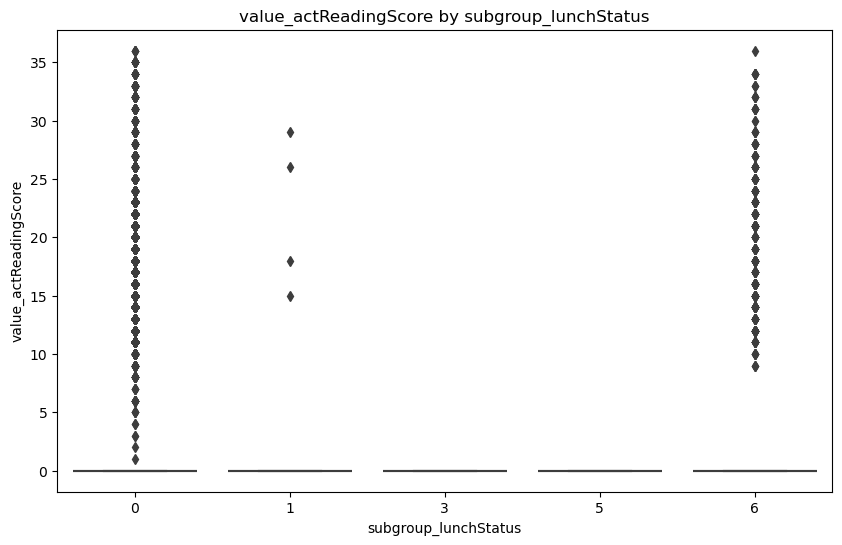

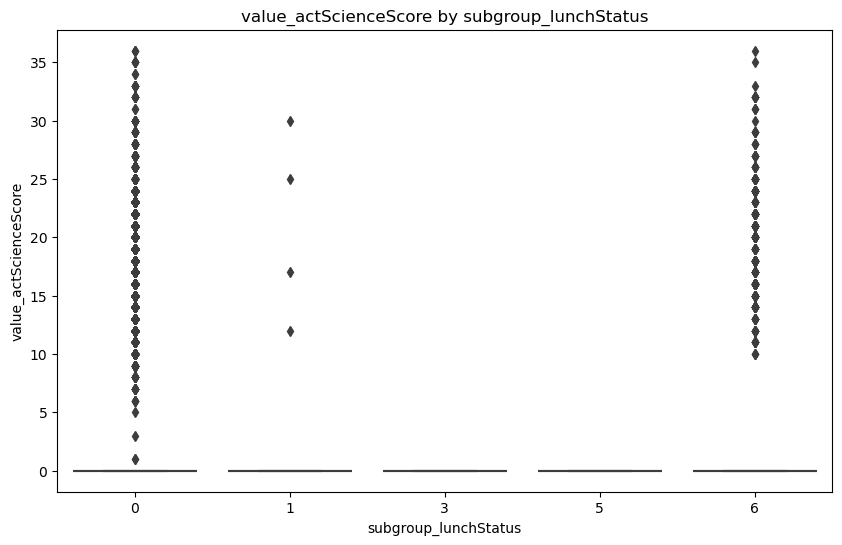

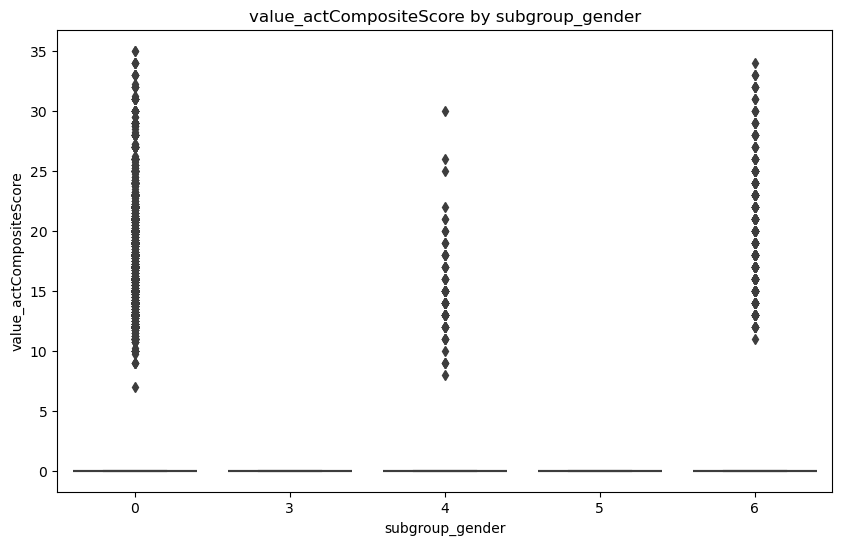

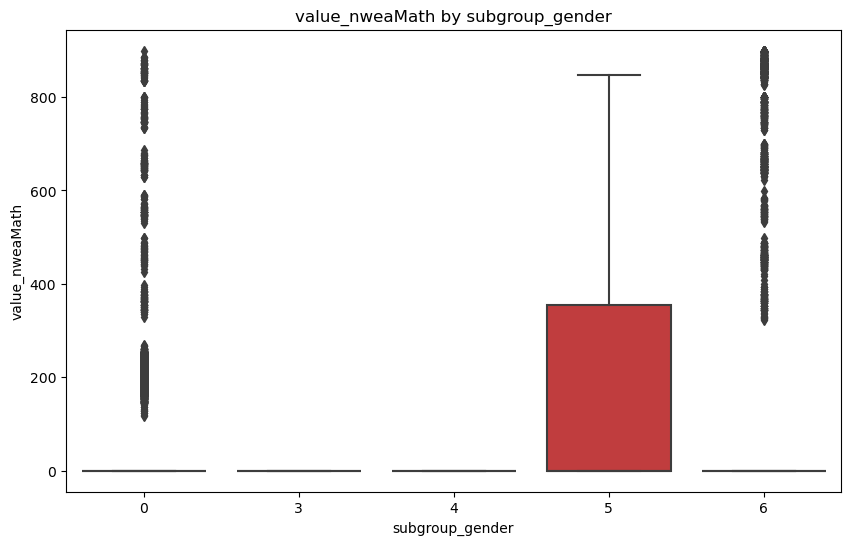

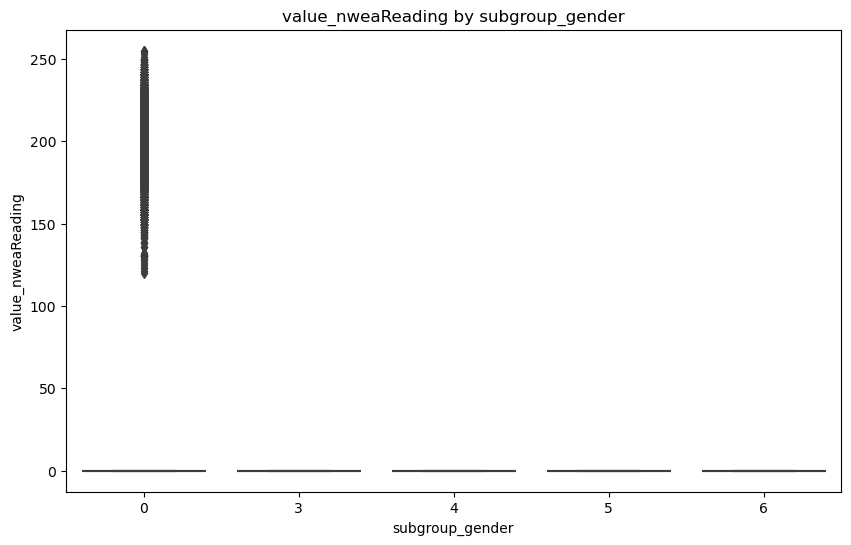

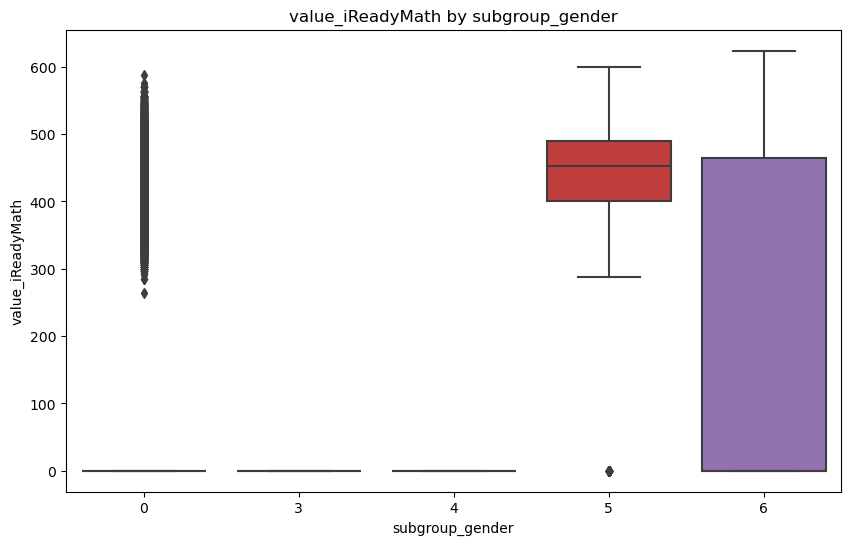

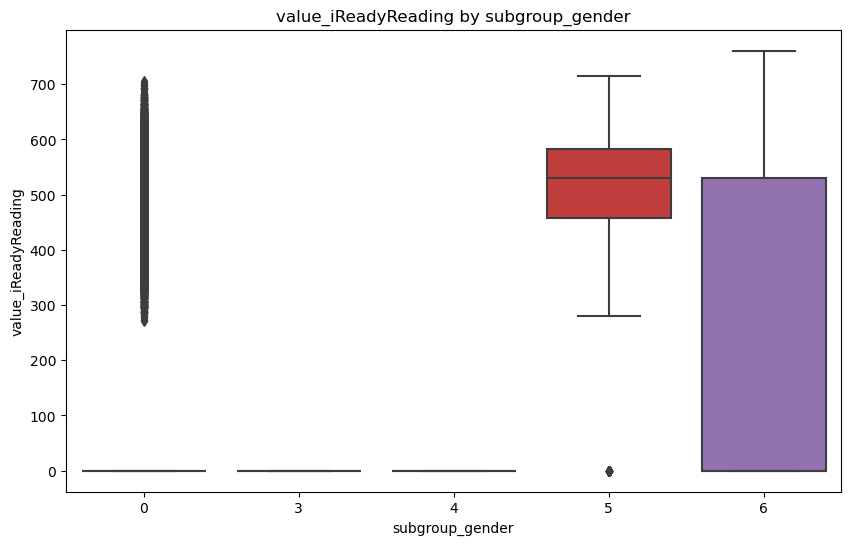

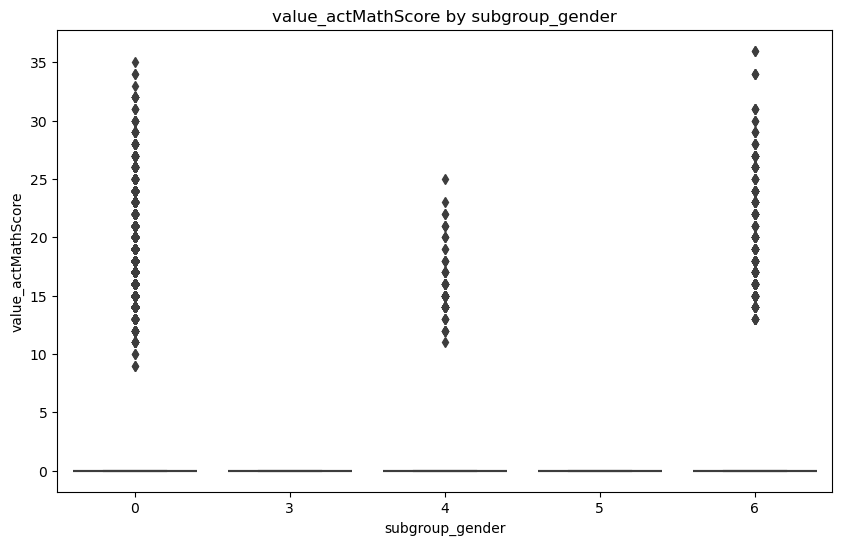

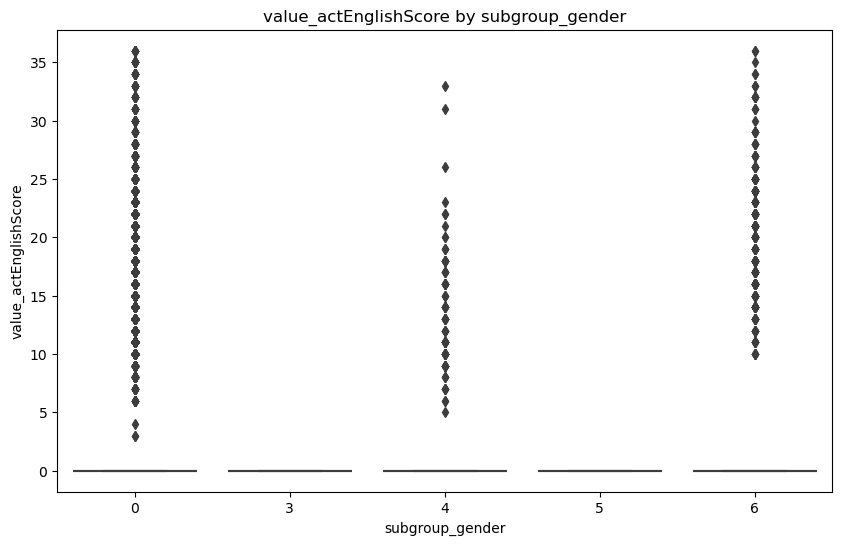

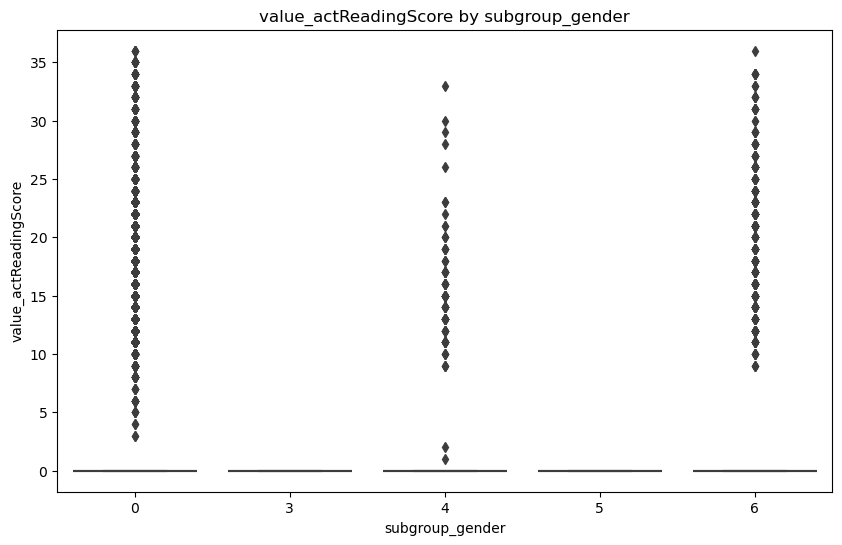

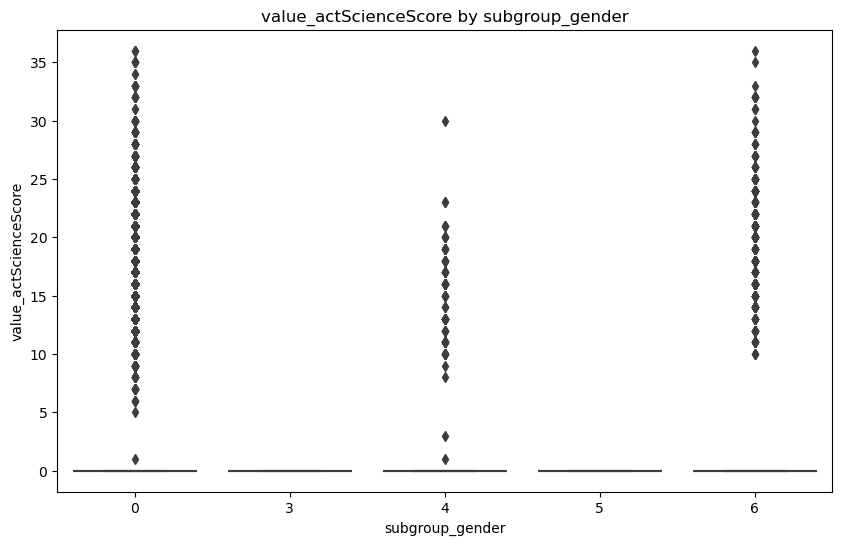

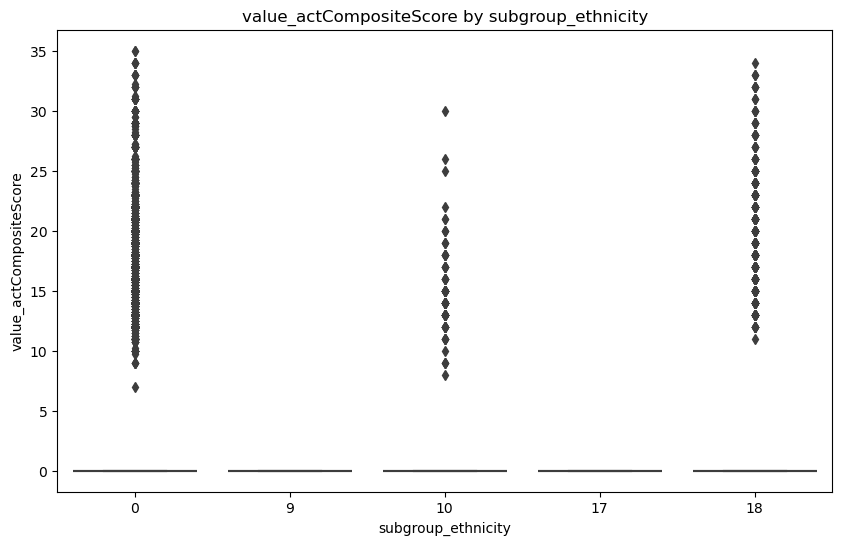

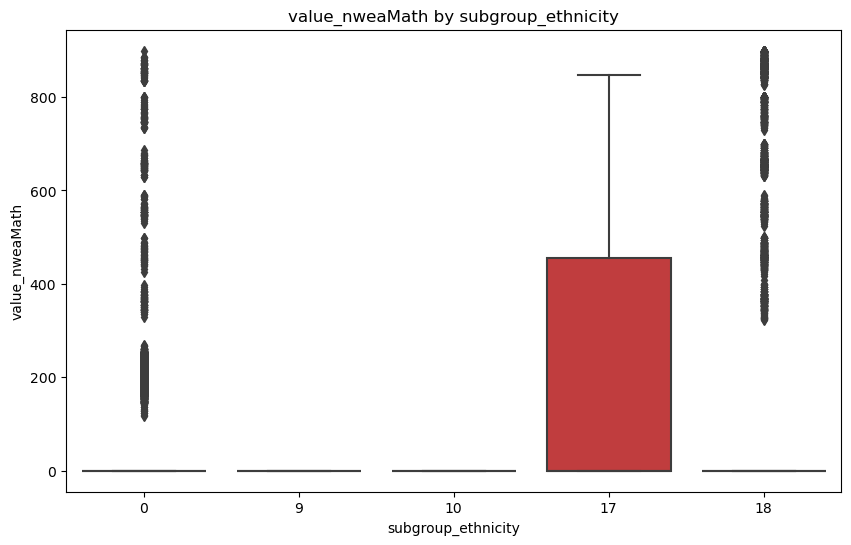

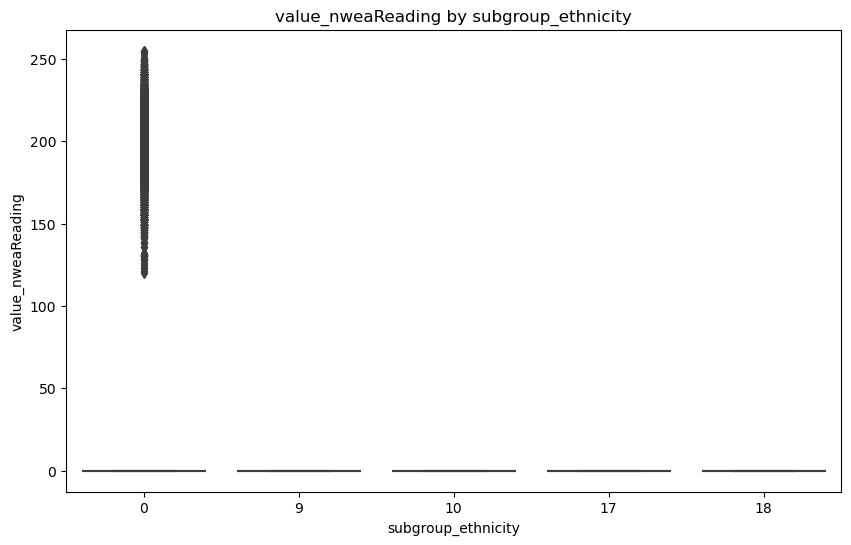

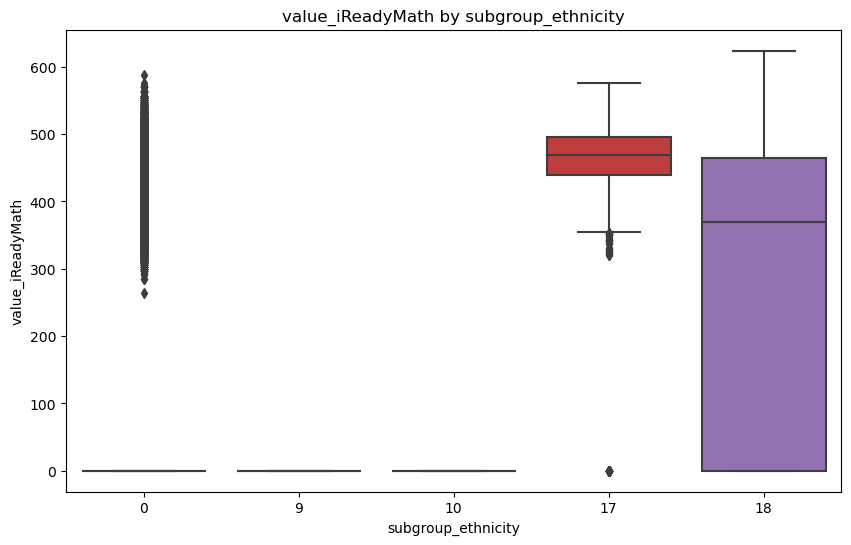

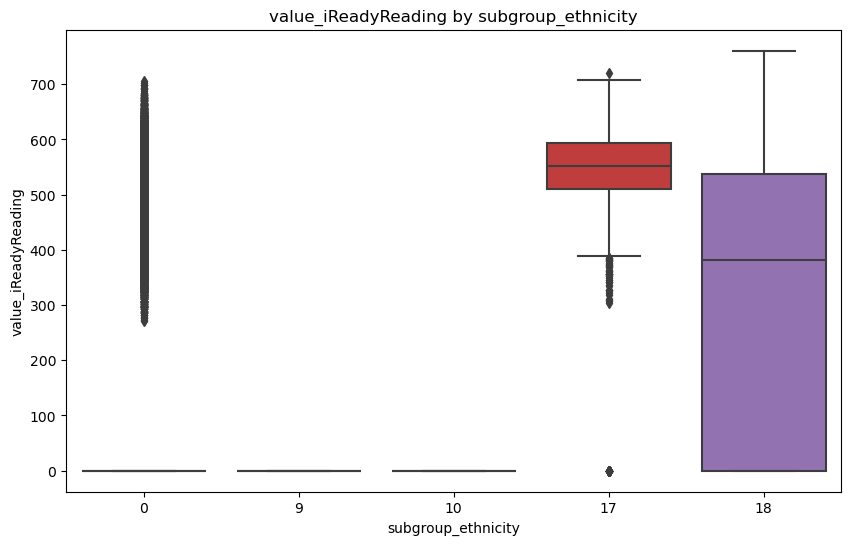

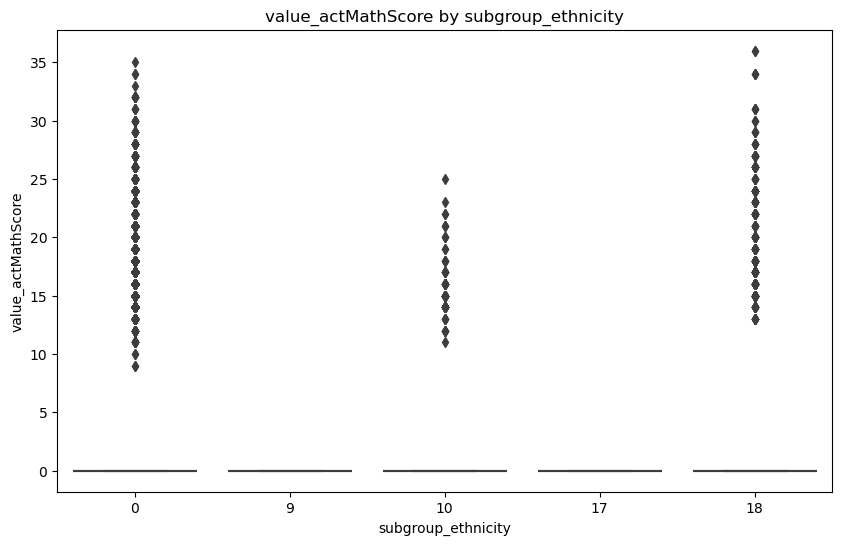

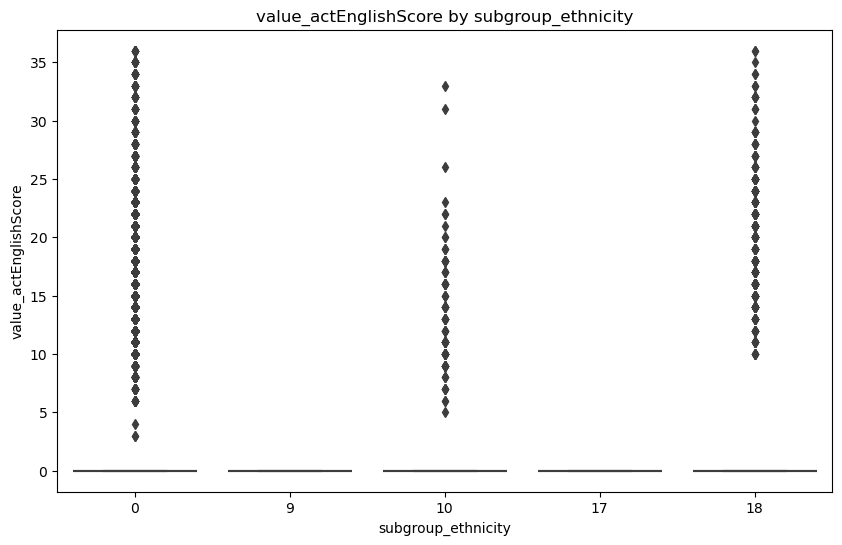

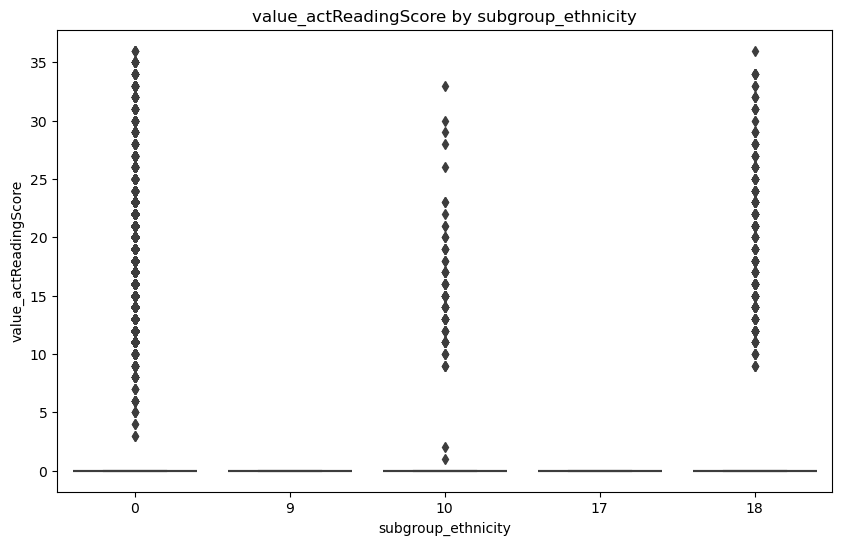

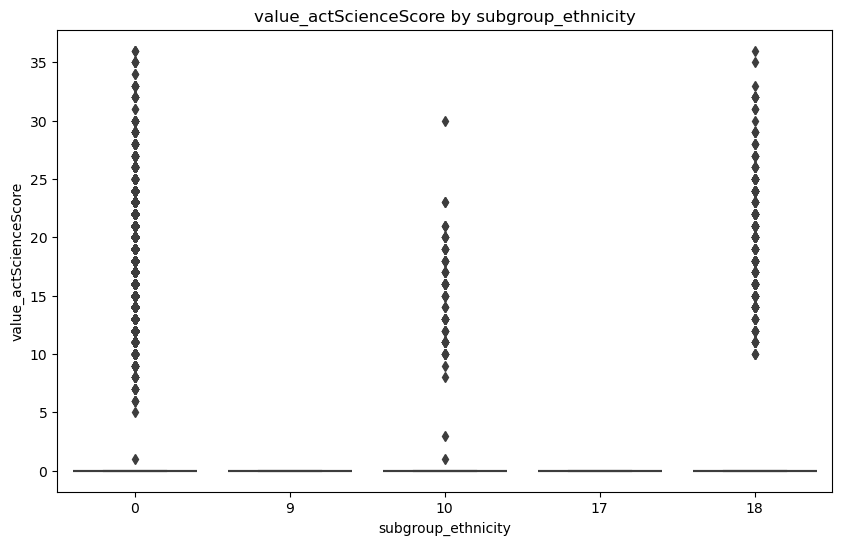

In [94]:

# Box plots for different subgroups
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']

for subgroup in subgroup_columns:
    for metric in performance_metrics:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=scores_df, x=subgroup, y=metric)
        plt.title(f'{metric} by {subgroup}')
        plt.show()




In [100]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

### Distribution of scores across different test measures
- certain tests do not have a normally distributed range of scores
- This includes:
- certain tests have skewed data, but are fairly normally distributed
- These include:
- Certain tests have fairly normally distributed scores:
- These include:

We need more information about proficient scores in testing, as well as how the scoring works in order to identify whether the test scores accurately predict student performance. **(fill in more insights later)**

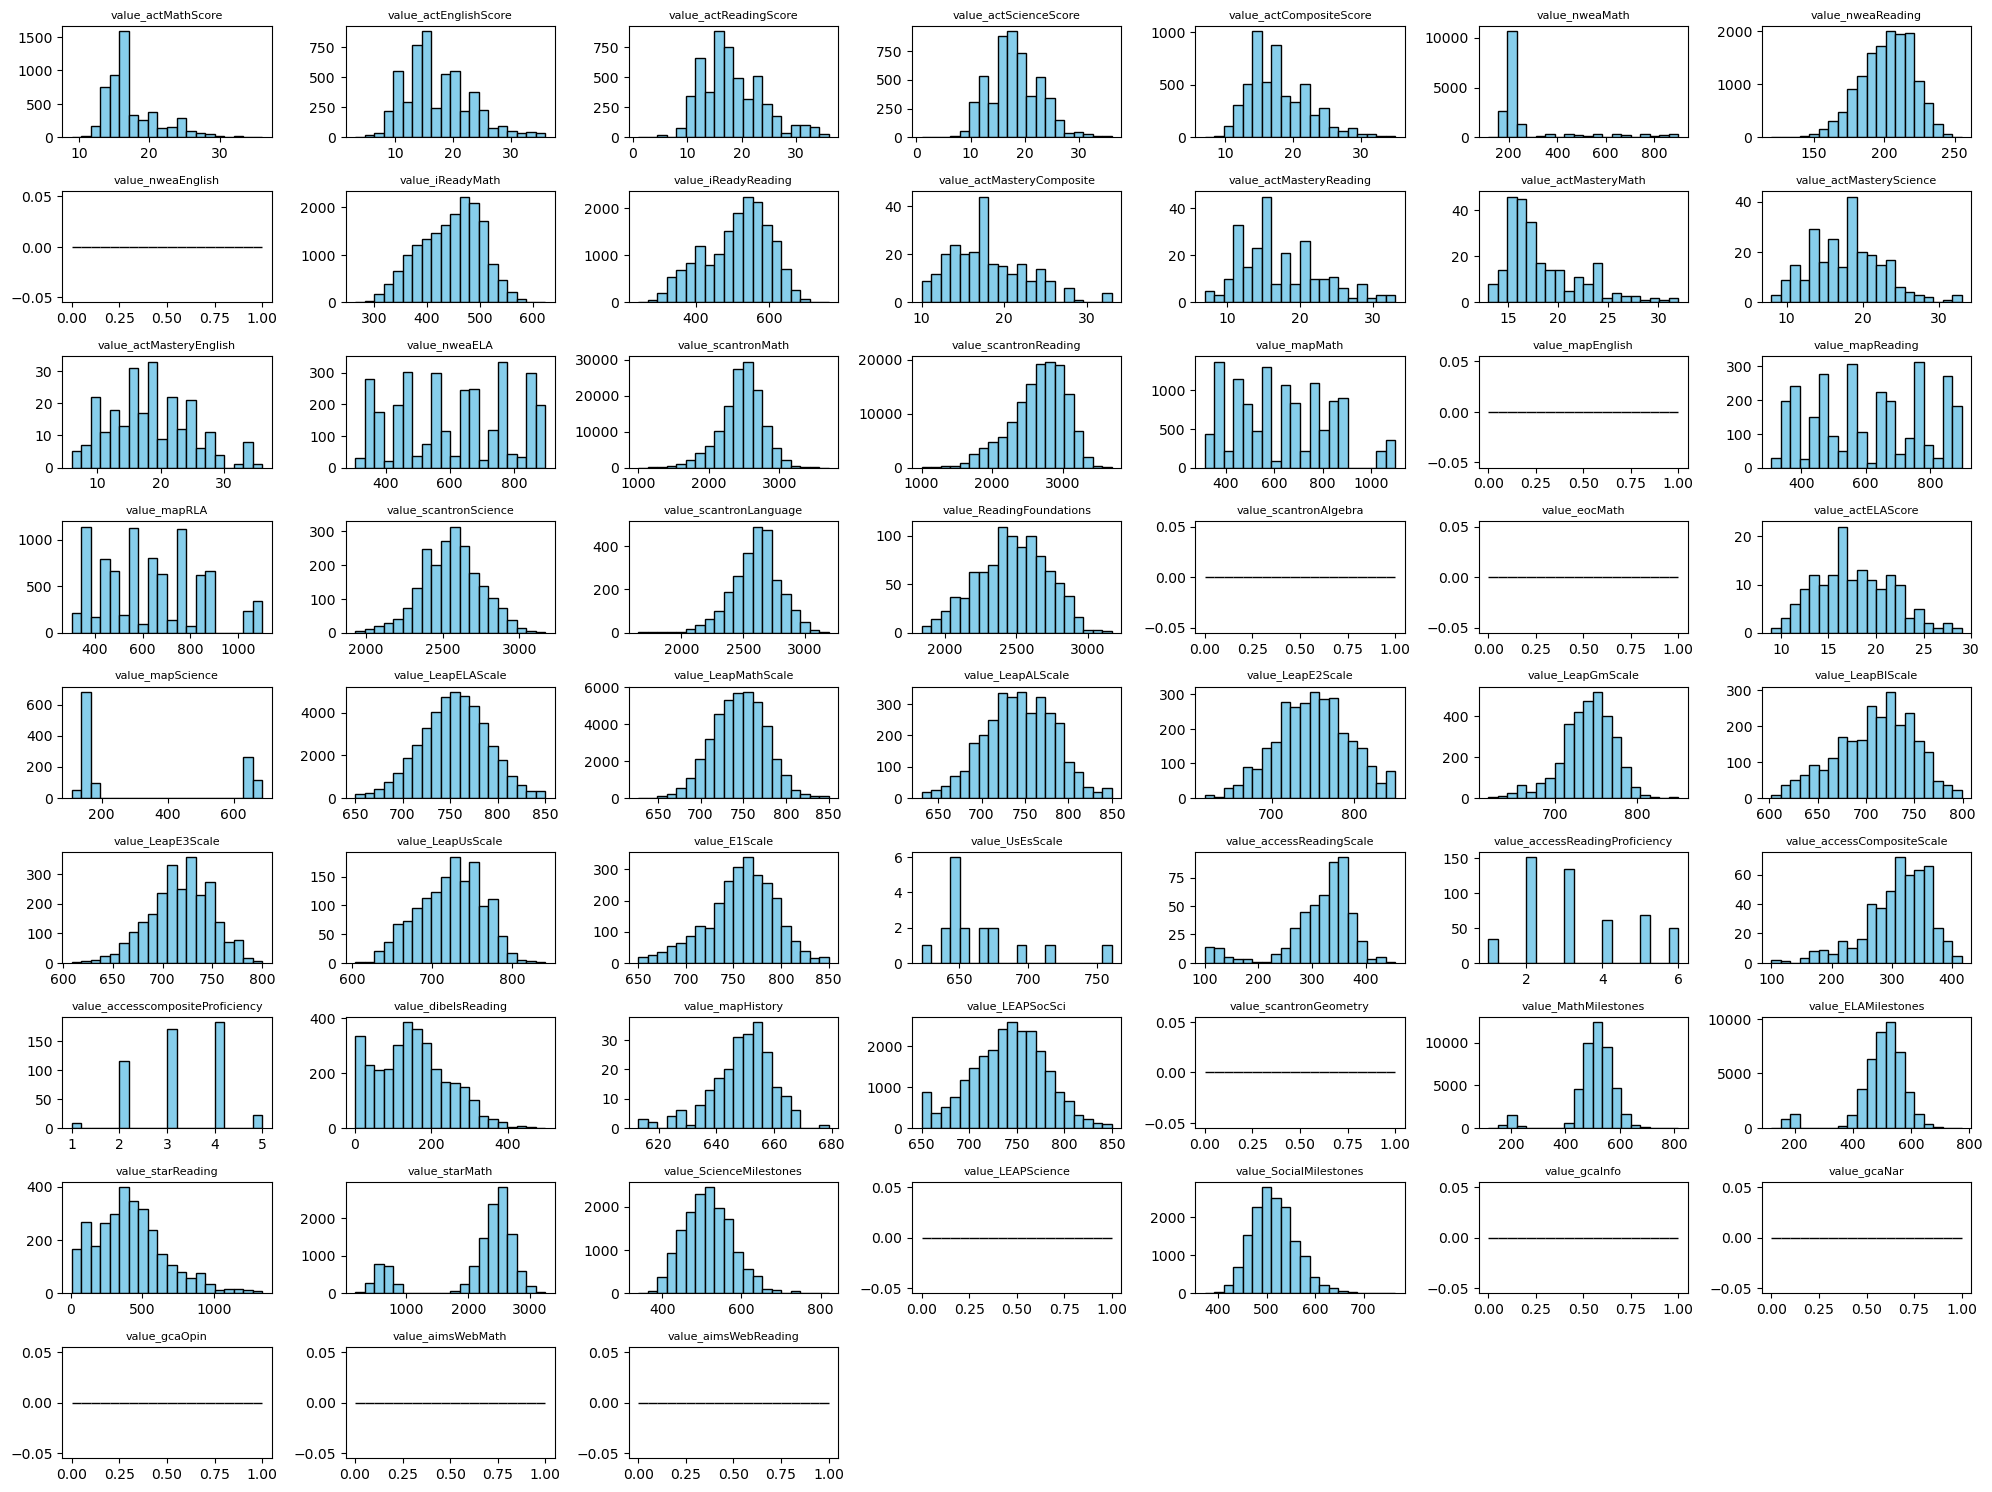

In [102]:

import matplotlib.pyplot as plt


# List of score-related columns
score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
    'value_iReadyReading', 'value_actMasteryComposite', 'value_actMasteryReading',
    'value_actMasteryMath', 'value_actMasteryScience', 'value_actMasteryEnglish',
    'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 
    'value_mapMath', 'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
    'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations',
    'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore', 'value_mapScience',
    'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
    'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency',
    'value_accessCompositeScale', 'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_scantronGeometry', 'value_MathMilestones',
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 'value_ScienceMilestones', 
    'value_LEAPScience', 'value_SocialMilestones', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 
    'value_aimsWebMath', 'value_aimsWebReading'
]

# Plotting frequency histograms for each score column, excluding values <= 0
plt.figure(figsize=(20, 15))  # Setting figure size
for i, col in enumerate(score_columns, 1):
    plt.subplot(9, 7, i)  # Adjust rows/columns based on the number of score columns
    # Filter out values <= 0 before plotting
    filtered_data = scores_df[col].dropna()
    filtered_data = filtered_data[filtered_data > 0]  # Exclude 0 and negative values
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(col, fontsize=8)
    plt.tight_layout(pad=1.0)

plt.show()


Note that certain testing measures do not have normally distributed scores. That may impact their predictability of student success